In [ ]:
import pandas as pd
import seaborn as sns
import toolbox as tbx
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV,cross_val_score, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Sommaire :

**1. Data Preprocessing**
- <a href="#C1">1.1. Description du jeu de données</a>
- <a href="#C2">1.2. Traitement des valeurs manquantes</a>
- <a href="#C3">1.3. Analyse univariée </a>


**2. Clustering (kmeans)**
- <a href="#C4">2.1. Analyse en Composantes Principales</a>
- <a href="#C5">2.2. Nombre optimal des clusters </a>
- <a href="#C6">2.3. Kmeans </a>

**3. Regression Logistique**
- <a href="#C7">3.1. Implémentation</a>
- <a href="#C8">3.2. Évaluation </a>
- <a href="#C9">3.3. Optimisation </a>

**4. Test des modèles**
- <a href="#C10"> 4.1. Préparation de l'échatillon</a>
- <a href="#C11"> 4.2. Implémentation de la fonction </a>
- <a href="#C12"> 4.3. Résultats des tests</a>

**5. Application Streamlit**
- <a href="#C13"> 5.1. Présentation de l'application.</a>


<h2><center>Contexte</center></h2> 

Ce projet consiste à prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées de la ville de Seattle.

Cette prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)

Nous avons à notre disposition un jeu de données contenant les réléés de 2016. 
</br>
<br>

TAF :
1. Réaliser une courte analyse exploratoire.
2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

**Plan d'action**

- Data Intro  : parcourir le dataset et appliquer les premiers filtres (habitation, conformité, outliers etc...) et générer des rapports ...
- Data cleaning (1er tri) : supressions des données non nécessaires
- Data Engineering : création de nouvelles features
- Data cleaning ((2e tri) ) : supressions des données non nécessaires
- Data exploration : stats + Viz

source des données : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

## Data Intro

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

*********************************** Data infos ***********************************
Nombre de colonnes :  46 

Nombre de lignes :  3376 

********************************** Valeurs manquantes **********************************


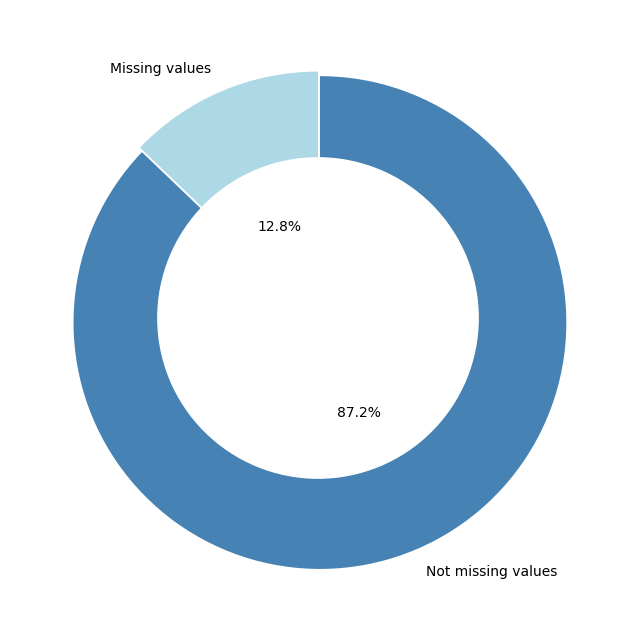

Nombre total de valeurs manquantes :  19952 

************************* Clés primaires candidates *************************
['OSEBuildingID']
['OSEBuildingID', 'DataYear']
['OSEBuildingID', 'BuildingType']
Nombre maximum autorisé atteint. Veuillez augmenter cette valeur si vous voulez rechercher davantage de clés primaires candidates.

************************* Rapport des doublons ************************* 

Nombre de doublons :  0 

************************* Rapport de conformité des batiments ************************* 



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

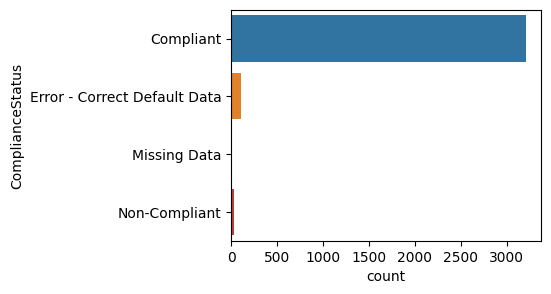

Nombre de batiments conformes:  3211
Nombre de batiments non conformes et autres:  165 

************************* Rapport des batiments résidentiels et non résidentiels ************************* 



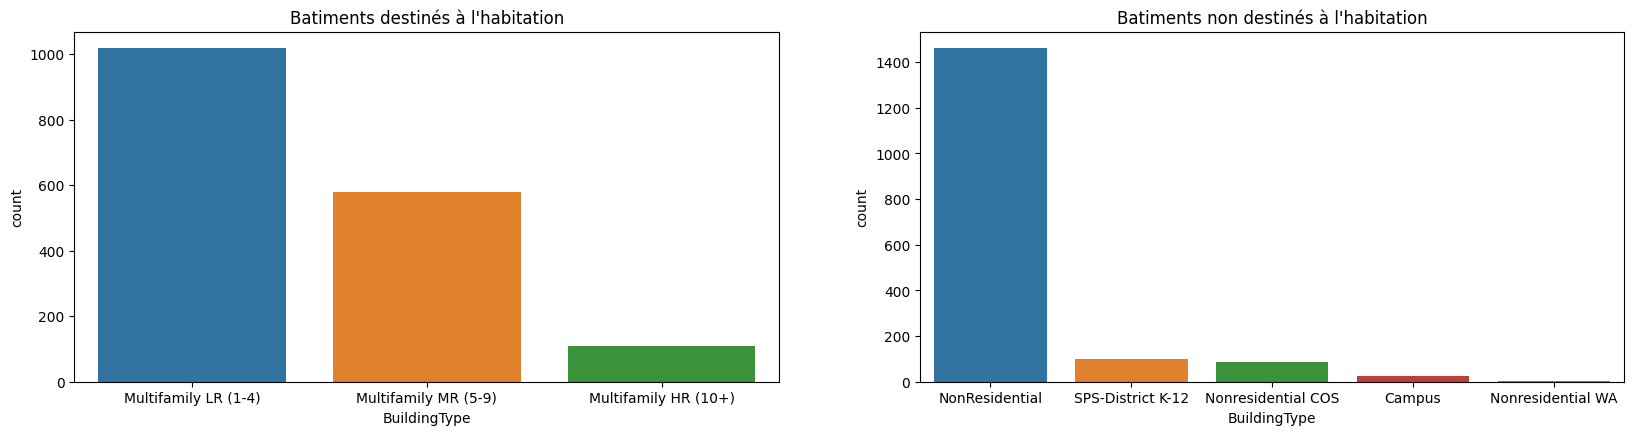

 Nombre de batiments destinés à l'habitation : 1708
 Nombre de batiments non destinés à l'habitation : 1668
Les batiments destinés à l'habitation ne seront pas pris compte pour la suite de l'analyse
************************* Rapport des outliers ************************* 



PrimaryPropertyType       Outlier  SiteEUI(kBtu/sf)
3341         Mid-Rise Multifamily   Low outlier          0.400000
2189                        Other   Low outlier          0.700000
1229  Small- and Mid-Sized Office   Low outlier          1.000000
3152                        Other   Low outlier          1.800000
1295                        Other   Low outlier          1.800000
2450         Low-Rise Multifamily   Low outlier          3.400000
1045                 Retail Store   Low outlier          3.600000
1611             Worship Facility   Low outlier          4.200000
384                  Retail Store   Low outlier          4.600000
2801             Worship Facility   Low outlier          5.200000
1945  Small- and Mid-Sized Office   Low outlier          6.300000
2129                  K-12 School   Low outlier          6.700000
2476         Low-Rise Multifamily   Low outlier          7.000000
2353         Low-Rise Multifamily   Low outlier          7.600000
1341         Low-Rise Multifamily   Low outlier          7.900000
1888         Low-Rise Multifamily   Low outlier          8.200000
834          Low-Rise Multifamily   Low outlier          9.700000
2216  Small- and Mid-Sized Office   Low outlier          9.800000
962          Low-Rise Multifamily   Low outlier          9.900000
839                   K-12 School   Low outlier         12.100000
720         High-Rise Multifamily   Low outlier         17.299999
2410                        Hotel   Low outlier         19.799999
448                  Large Office   Low outlier         58.000000
2922         Low-Rise Multifamily  High outlier        104.300003
2863         Low-Rise Multifamily  High outlier        112.199997
3082         Low-Rise Multifamily  High outlier        131.300003
2763         Low-Rise Multifamily  High outlier        133.500000
3265         Low-Rise Multifamily  High outlier        136.699997
3092         Mid-Rise Multifamily  High outlier        147.500000
1707         Mid-Rise Multifamily  High outlier        221.000000
226                  Large Office  High outlier        297.399994
517                  Large Office  High outlier        311.700012

Les outliers sont basés sur la conso d'energie par rapport à la suface


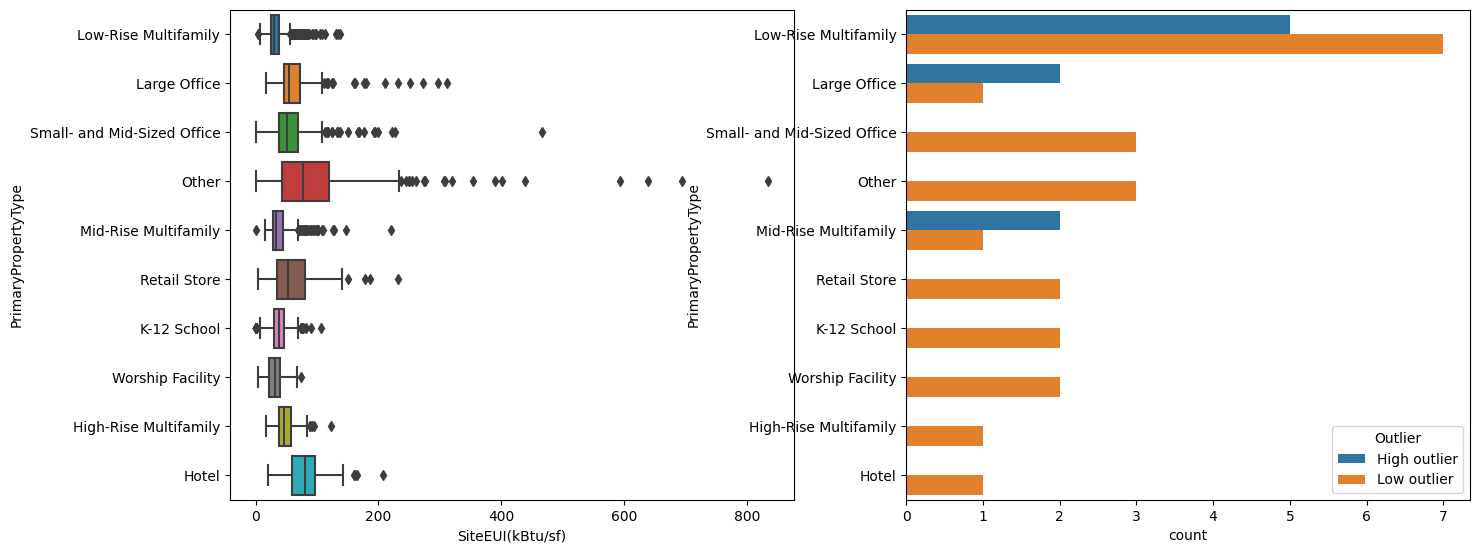

Nombre total d'outliers selon la colonne outliers:  32


In [2]:
df = pd.read_csv('./data/2016_Building_Energy_Benchmarking.csv')
display(df.head())
tbx.describe_data(df)
print('*'*25, 'Clés primaires candidates','*'*25)
tbx.cles_potentielles(df, max_allowed=2)
print()

#  ---- Duplicates ------- #
print('*'*25, 'Rapport des doublons','*'*25,'\n')
print('Nombre de doublons : ',len(df[df.duplicated(subset='OSEBuildingID')]),'\n')

#  ---- Compliance ------- #
print('*'*25, 'Rapport de conformité des batiments','*'*25,'\n')
display(df.loc[df['ComplianceStatus'] == 'Compliant'].head())
plt.figure(figsize=(4,3))
sns.countplot(data=df, y='ComplianceStatus')
plt.show()
print('''Nombre de batiments conformes: ''', len(df[df['ComplianceStatus'] == 'Compliant']))
print('''Nombre de batiments non conformes et autres: ''', len(df[df['ComplianceStatus'] != 'Compliant']),'\n')

#  ---- Batiments résidentiels et non résidentiels------- #
print('*'*25, 'Rapport des batiments résidentiels et non résidentiels','*'*25,'\n')
residential = df[df["BuildingType"].isin([elem for elem in df["BuildingType"].unique() if 'family' in elem])]
non_residential = df[~df["BuildingType"].isin([elem for elem in df["BuildingType"].unique() if 'family' in elem])]
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('''Batiments destinés à l'habitation''')
sns.countplot(data=residential, x='BuildingType', order=residential['BuildingType'].value_counts().index)
plt.subplot(2,2,2)
plt.title('''Batiments non destinés à l'habitation''')
sns.countplot(data=non_residential, x='BuildingType', order=non_residential['BuildingType'].value_counts().index)
plt.show()
print(''' Nombre de batiments destinés à l'habitation :''', len(residential))
print(''' Nombre de batiments non destinés à l'habitation :''', len(non_residential))
# On filtre les batiments destinés à l'habitation
data = df[~df["BuildingType"].isin([elem for elem in df["BuildingType"].unique() if 'family' in elem])]
print('''Les batiments destinés à l'habitation ne seront pas pris compte pour la suite de l'analyse''')

#  ---- Outliers ------- #
print('*'*25, 'Rapport des outliers','*'*25,'\n')
display(df.loc[df['Outlier'].notnull(), ['PrimaryPropertyType', 'Outlier','SiteEUI(kBtu/sf)']].sort_values('SiteEUI(kBtu/sf)'))
print('''Les outliers sont basés sur la conso d'energie par rapport à la suface''')
plt.figure(figsize=(16,14))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='SiteEUI(kBtu/sf)',y='PrimaryPropertyType', order=df[df['Outlier'].notnull()]['PrimaryPropertyType'].value_counts().index)
plt.subplot(2,2,2)
sns.countplot(data=df, y='PrimaryPropertyType', hue='Outlier', order=df[df['Outlier'].notnull()]['PrimaryPropertyType'].value_counts().index)
plt.show()
print('''Nombre total d'outliers selon la colonne outliers: ''', len(df[df['Outlier'].notnull()]))


## Data cleaning

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

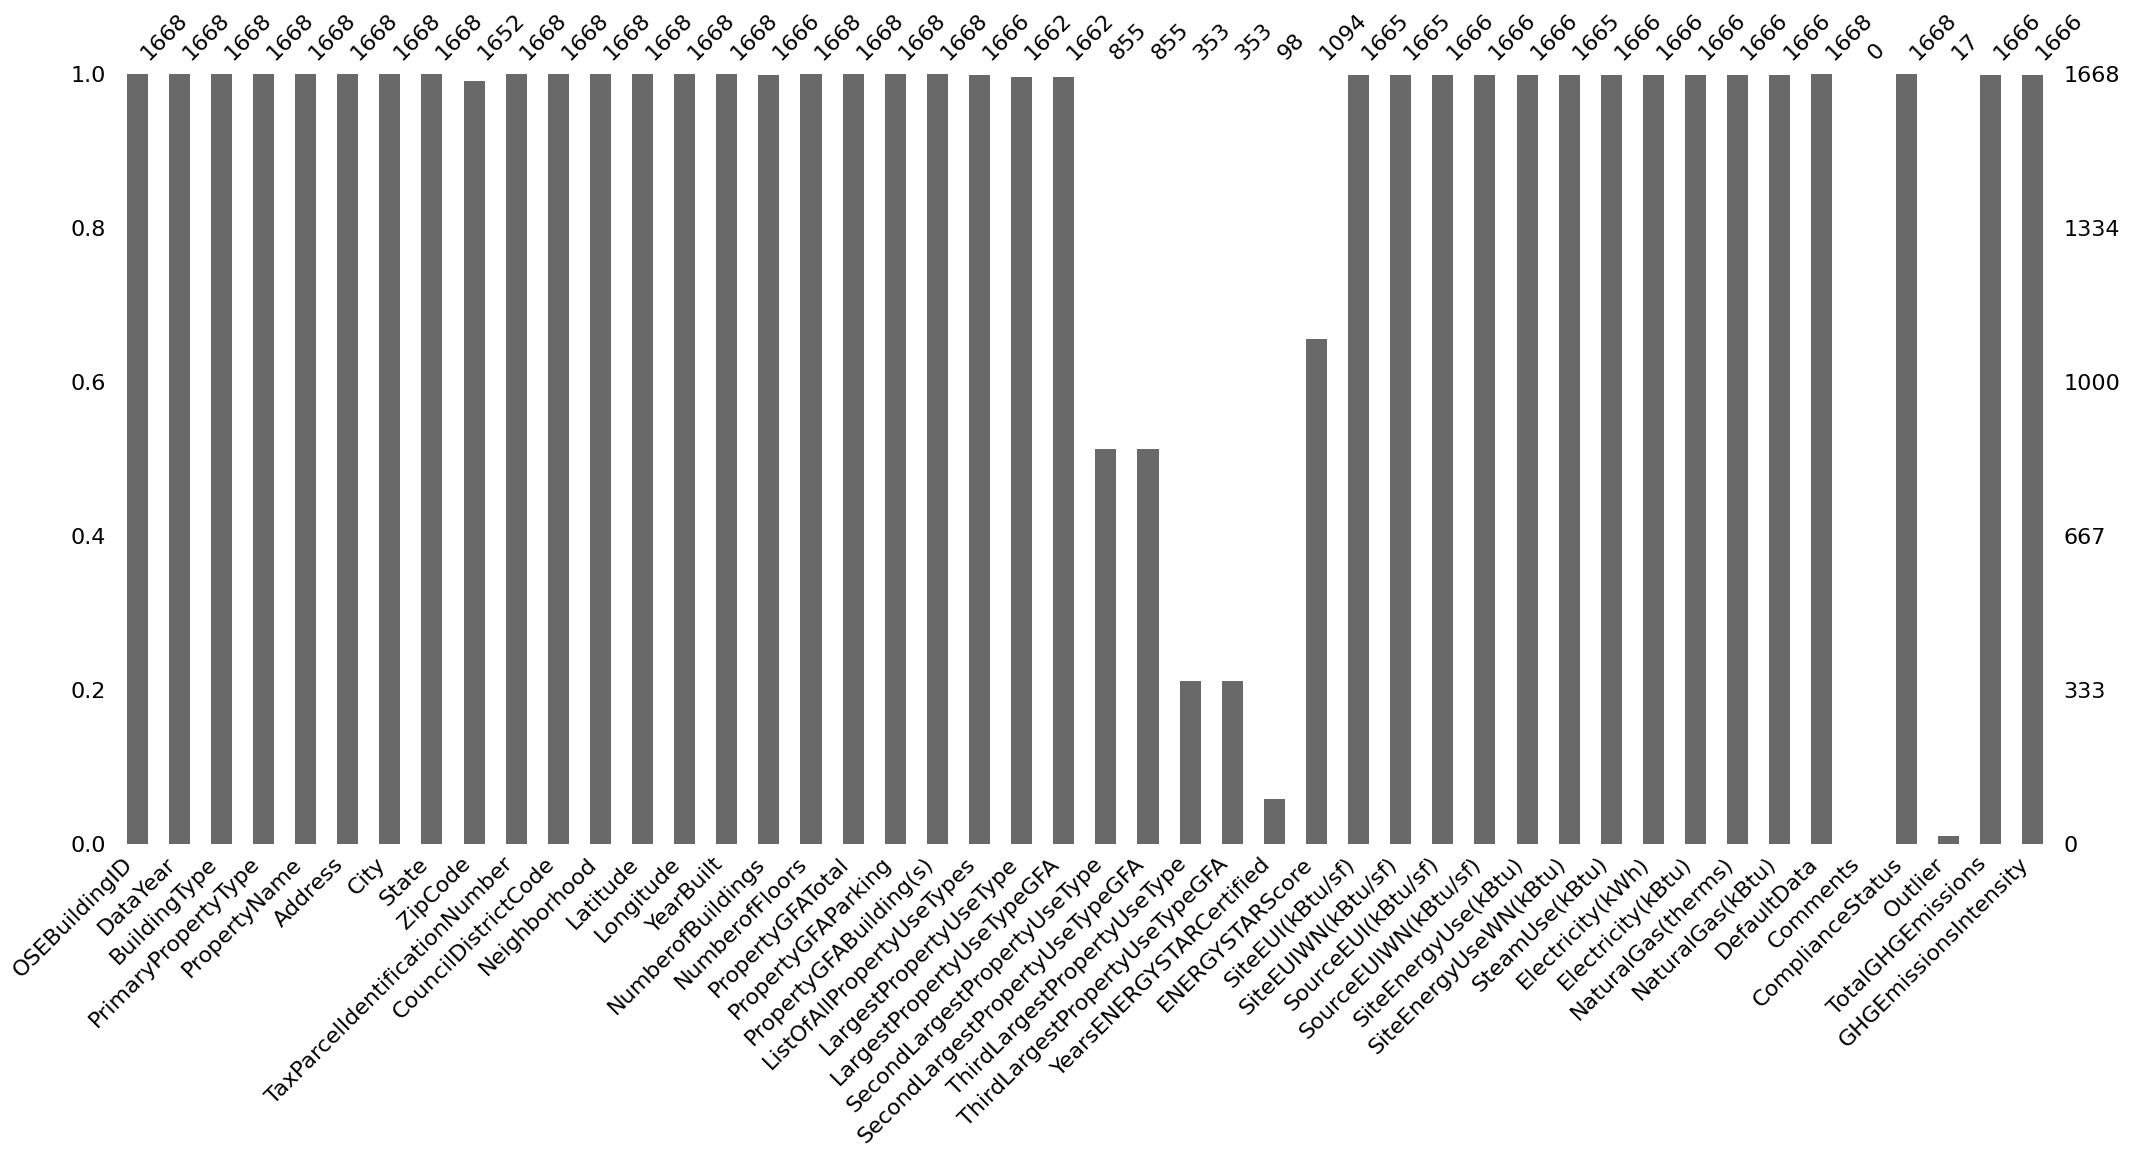

In [3]:
display(data.head())
msno.bar(data)
plt.show()

### Colonnes peu renseignées

In [4]:
# Drop colonnes trop peu renseignées
data.drop('YearsENERGYSTARCertified', axis=1, inplace=True)

In [5]:
data

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

### Colonnes non nécessaires

In [6]:
# Colonnes non nécessaires (1er tri)
useless_columns = [
                    "OSEBuildingID",
                    "Comments", 
                    "ComplianceStatus", 
                    "CouncilDistrictCode",
                    "DefaultData",
                    "PropertyName", 
                    "TaxParcelIdentificationNumber", 
                    "ZipCode", 
                    "Outlier"]

data[useless_columns].head(3)

OSEBuildingID  Comments ComplianceStatus  CouncilDistrictCode  DefaultData  \
0              1       NaN        Compliant                    7        False   
1              2       NaN        Compliant                    7        False   
2              3       NaN        Compliant                    7        False   

              PropertyName TaxParcelIdentificationNumber  ZipCode Outlier  
0     Mayflower park hotel                    0659000030  98101.0     NaN  
1          Paramount Hotel                    0659000220  98101.0     NaN  
2  5673-The Westin Seattle                    0659000475  98101.0     NaN

In [7]:
# drop useless
data.drop(useless_columns, axis=1, inplace=True)

### Colonnes peu redondantes

In [8]:

# Colonnes redondantes (à garder pour les tests après les prédictions)
redundant_columns  = [
                    'Electricity(kWh)', 
                    'NaturalGas(therms)',
                    'SiteEUI(kBtu/sf)', 
                    'SiteEUIWN(kBtu/sf)', 
                    'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)', 
                    'SiteEnergyUseWN(kBtu)', 
                    'GHGEmissionsIntensity'
                    ]

data[redundant_columns].head(3)

Electricity(kWh)  NaturalGas(therms)  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
0      1.156514e+06         12764.52930         81.699997           84.300003   
1      9.504252e+05         51450.81641         94.800003           97.900002   
2      1.451544e+07         14938.00000         96.000000           97.699997   

   SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  \
0          182.500000            189.000000              7456910.0   
1          176.100006            179.399994              8664479.0   
2          241.899994            244.100006             73937112.0   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19

In [9]:
# drop redundant
data.drop(redundant_columns, axis=1, inplace=True)

### Valeurs aberrantes

In [10]:
data.describe()

DataYear     Latitude    Longitude    YearBuilt  NumberofBuildings  \
count    1668.0  1668.000000  1668.000000  1668.000000        1666.000000   
mean     2016.0    47.616054  -122.332908  1961.913669           1.168667   
std         0.0     0.048168     0.024580    32.741755           2.931409   
min      2016.0    47.499170  -122.411820  1900.000000           0.000000   
25%      2016.0    47.585458  -122.343280  1930.000000           1.000000   
50%      2016.0    47.612340  -122.332935  1965.000000           1.000000   
75%      2016.0    47.649675  -122.321675  1989.000000           1.000000   
max      2016.0    47.733870  -122.258640  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1668.000000      1.668000e+03         1668.000000   
mean         4.121103      1.188427e+05        12897.979017   
std          6.563407      2.973622e+05        42274.511185   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.947775e+04            0.000000   
50%          2.000000      4.928950e+04            0.000000   
75%          4.000000      1.053250e+05            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.668000e+03               1.662000e+03   
mean             1.059447e+05               9.876469e+04   
std              2.842116e+05               2.767111e+05   
min              3.636000e+03               5.656000e+03   
25%              2.847525e+04               2.552750e+04   
50%              4.739150e+04               4.377050e+04   
75%              9.475975e+04               9.198375e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       855.000000                       353.00000   
mean                      36804.160581                     14923.13994   
std                       69845.261024                     36790.55656   
min                           0.000000                         0.00000   
25%                        5350.000000                      2663.00000   
50%                       12000.000000                      5931.00000   
75%                       31881.000000                     12941.00000   
max                      686750.000000                    459748.00000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count      1094.000000         1.666000e+03    1.666000e+03   
mean         65.449726         8.437933e+06    5.125726e+05   
std          28.492928         3.024380e+07    5.513944e+06   
min           1.000000         0.000000e+00    0.000000e+00   
25%          48.000000         1.229291e+06    0.000000e+00   
50%          73.000000         2.554947e+06    0.000000e+00   
75%          89.000000         6.913348e+06    0.000000e+00   
max         100.000000         8.739237e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
count       1.666000e+03      1.666000e+03        1666.000000  
mean        5.843493e+06      1.970845e+06         184.973301  
std         2.079673e+07      9.370814e+06         751.976001  
min        -1.154170e+05      0.000000e+00          -0.800000  
25%         7.213255e+05      0.000000e+00          19.967500  
50%         1.611881e+06      4.982630e+05          49.580000  
75%         4.847589e+06      1.520000e+06         142.382500  
max         6.570744e+08      2.979090e+08       16870.980000

In [11]:

# On conserve uniquement les bâtiments dont la consommation totale d'énergie est > 0
data = data[data["SiteEnergyUse(kBtu)"]>0]

# On conserve uniquement les bâtiments avec des émissions de carbone > 0
data = data[data["TotalGHGEmissions"]>0]

DataYear     Latitude    Longitude    YearBuilt  NumberofBuildings  \
count    1648.0  1648.000000  1648.000000  1648.000000         1648.00000   
mean     2016.0    47.615841  -122.332852  1961.761529            1.17051   
std         0.0     0.048047     0.024461    32.791436            2.94733   
min      2016.0    47.499170  -122.411820  1900.000000            0.00000   
25%      2016.0    47.585280  -122.342997  1930.000000            1.00000   
50%      2016.0    47.612330  -122.332955  1965.000000            1.00000   
75%      2016.0    47.649473  -122.321770  1989.000000            1.00000   
max      2016.0    47.733870  -122.258640  2015.000000          111.00000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1648.000000      1.648000e+03         1648.000000   
mean         4.143204      1.186405e+05        13054.507888   
std          6.597924      2.974175e+05        42506.368222   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.938900e+04            0.000000   
50%          2.000000      4.898850e+04            0.000000   
75%          4.000000      1.053250e+05            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.648000e+03               1.644000e+03   
mean             1.055860e+05               9.844502e+04   
std              2.840931e+05               2.771455e+05   
min              3.636000e+03               5.656000e+03   
25%              2.831725e+04               2.548075e+04   
50%              4.696400e+04               4.348400e+04   
75%              9.475975e+04               9.195125e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       853.000000                      352.000000   
mean                      36067.769398                    14949.910224   
std                       66278.969065                    36839.484363   
min                           0.000000                        0.000000   
25%                        5300.000000                     2656.000000   
50%                       12000.000000                     5965.500000   
75%                       31845.000000                    12965.500000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count      1091.000000         1.648000e+03    1.648000e+03   
mean         65.417965         8.522287e+06    5.181711e+05   
std          28.474573         3.039631e+07    5.543731e+06   
min           1.000000         1.680890e+04    0.000000e+00   
25%          48.000000         1.257589e+06    0.000000e+00   
50%          73.000000         2.593203e+06    0.000000e+00   
75%          89.000000         6.962459e+06    0.000000e+00   
max         100.000000         8.739237e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
count       1.648000e+03      1.648000e+03        1648.000000  
mean        5.900325e+06      1.984194e+06         186.510613  
std         2.090270e+07      9.419563e+06         755.880837  
min         0.000000e+00      0.000000e+00           0.120000  
25%         7.272688e+05      0.000000e+00          20.475000  
50%         1.628064e+06      5.044845e+05          49.845000  
75%         4.899381e+06      1.524242e+06         143.607500  
max         6.570744e+08      2.979090e+08       16870.980000

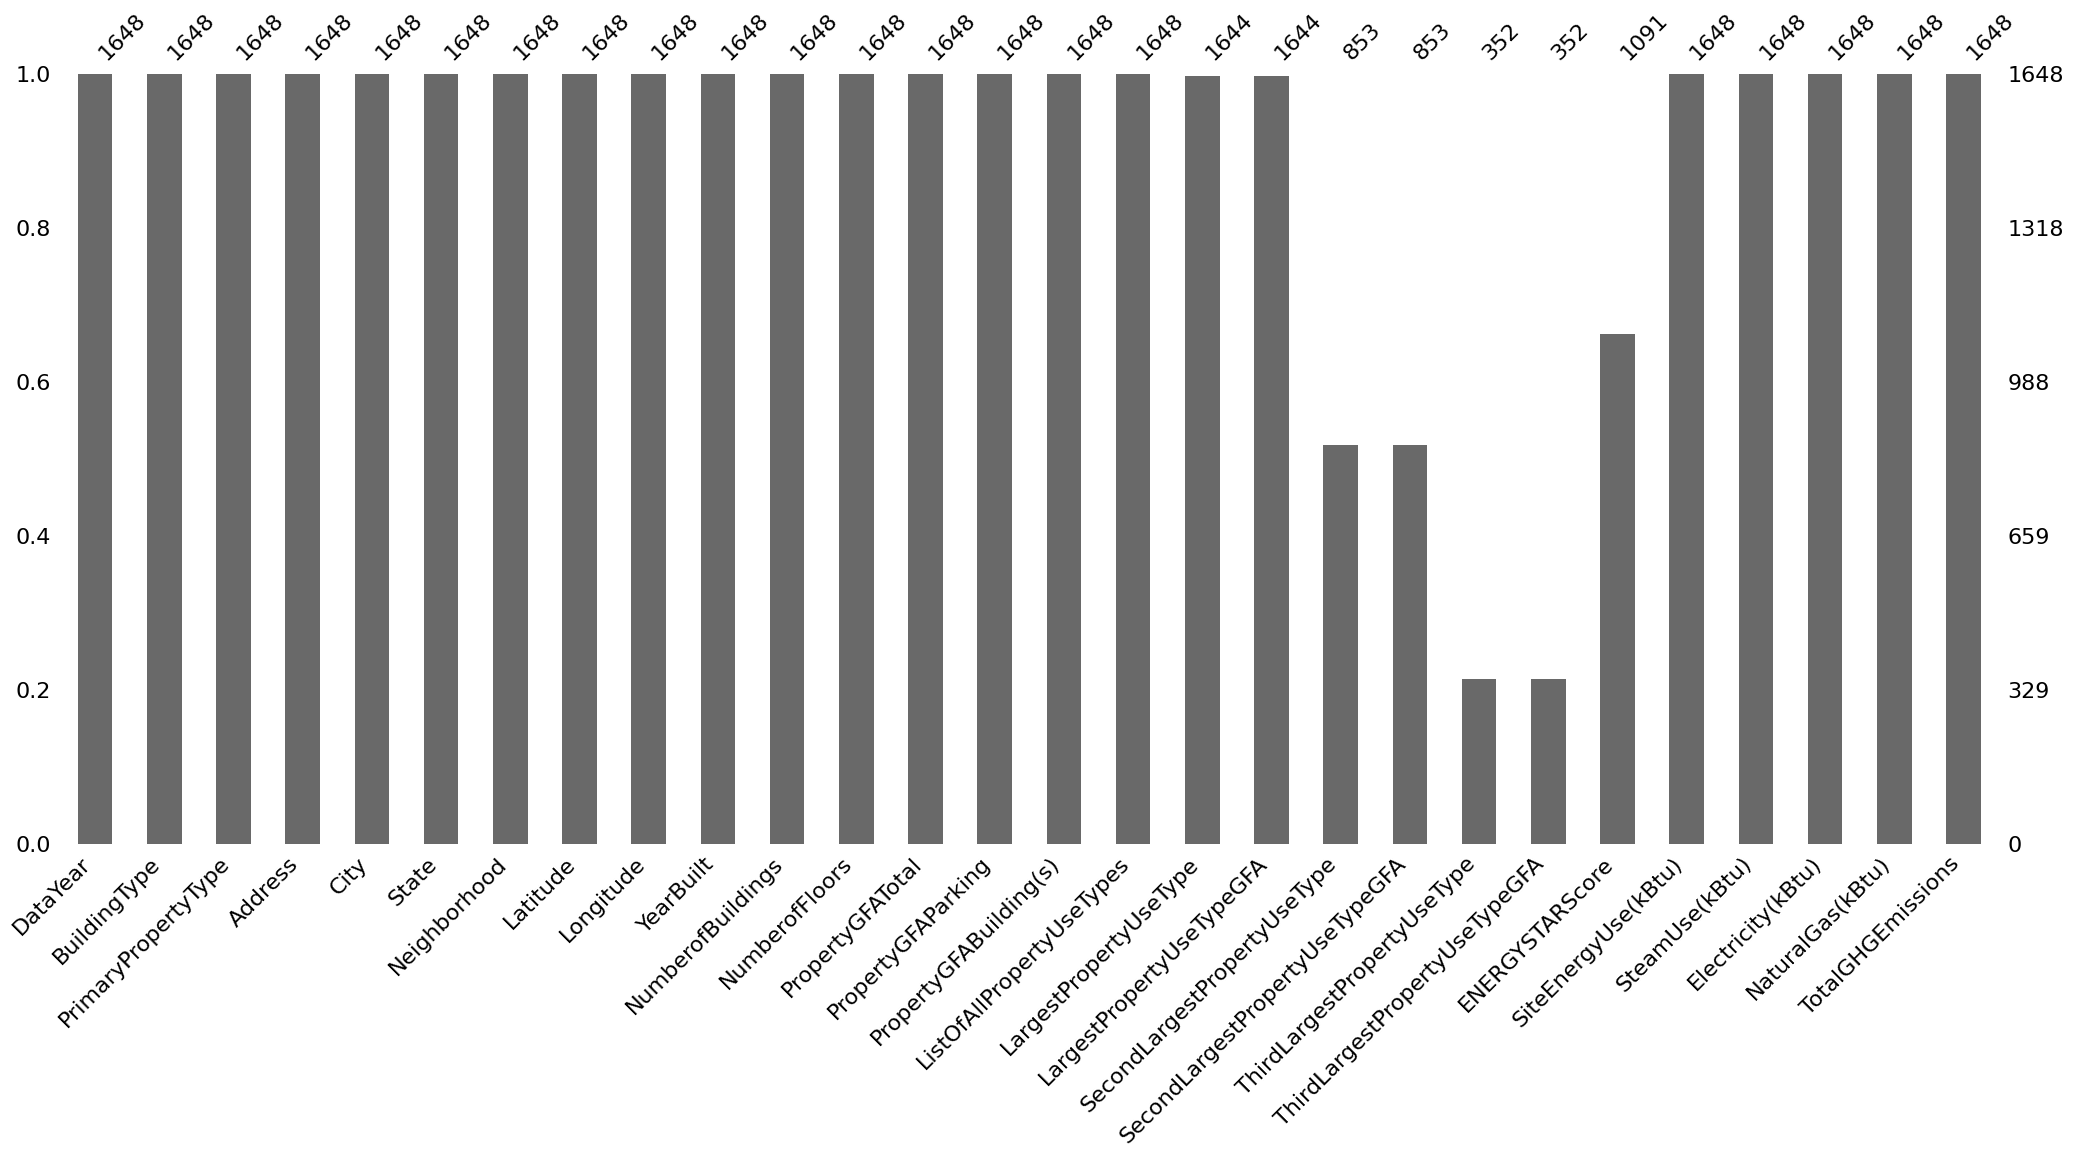

In [12]:
# Check
display(data.describe())
msno.bar(data)
plt.show()

## Feature Engineering

### L'âge des batiments

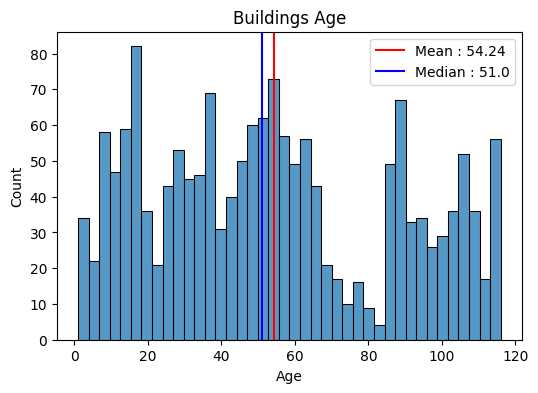

In [13]:
data['Age'] = data['DataYear'] - data['YearBuilt']

plt.figure(figsize=(6,4))
sns.histplot(data=data, x='Age', bins=40)
plt.axvline(data['Age'].mean(), color='r', label='Mean : {}'.format(round(data['Age'].mean(),2)))
plt.axvline(data['Age'].median(), color='b', label='Median : {}'.format(round(data['Age'].median(),2)))
plt.legend()
plt.title('Buildings Age')
plt.show()

In [14]:
useless_columns_2 = ['DataYear', 'YearBuilt']


### Les surfaces des batiments

PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            956110              196718                  759392   
3             61320                   0                   61320   
4            175580               62000                  113580   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    88434.0                              NaN   
1                    83880.0                          15064.0   
2                   756493.0                              NaN   
3                    61320.0                              NaN   
4                   123445.0                          68009.0   

   ThirdLargestPropertyUseTypeGFA  
0                             NaN  
1                          4622.0  
2                             NaN  
3                             NaN  
4                             0.0

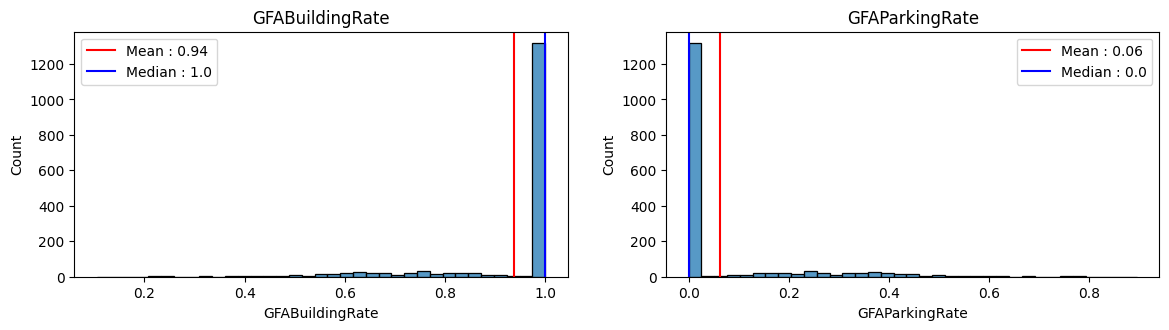

In [15]:

gfa = [elem for elem in data.columns if 'GFA' in elem]
display(data[gfa].head())

# On calcule mes proportions (building et parking) par rapport à la surface totale
data['GFABuildingRate'] = (round((data['PropertyGFABuilding(s)']/data['PropertyGFATotal']),4))
data['GFAParkingRate'] = (round((data['PropertyGFAParking']/data['PropertyGFATotal']),4))

# On remplace les nan par 0 
data[gfa] = data[gfa].fillna(0)

# On plot
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('GFABuildingRate')
sns.histplot(data=data, x='GFABuildingRate', bins=35)
plt.axvline(data['GFABuildingRate'].mean(), color='r', label='Mean : {}'.format(round(data['GFABuildingRate'].mean(),2)))
plt.axvline(data['GFABuildingRate'].median(), color='b', label='Median : {}'.format(round(data['GFABuildingRate'].median(),2)))
plt.legend()
plt.subplot(2,2,2)
plt.title('GFAParkingRate')
sns.histplot(data=data, x='GFAParkingRate', bins=35)
plt.axvline(data['GFAParkingRate'].mean(), color='r', label='Mean : {}'.format(round(data['GFAParkingRate'].mean(),2)))
plt.axvline(data['GFAParkingRate'].median(), color='b', label='Median : {}'.format(round(data['GFAParkingRate'].median(),2)))
plt.legend()
plt.show()

In [16]:
useless_columns_2 = useless_columns_2 + gfa
useless_columns_2.remove('PropertyGFATotal')
useless_columns_2.remove('LargestPropertyUseTypeGFA')

In [17]:
useless_columns_2

['DataYear',
 'YearBuilt',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

### Les types d'usage

PrimaryPropertyType      ListOfAllPropertyUseTypes LargestPropertyUseType  \
0               Hotel                          Hotel                  Hotel   
1               Hotel     Hotel, Parking, Restaurant                  Hotel   
2               Hotel                          Hotel                  Hotel   
3               Hotel                          Hotel                  Hotel   
4               Hotel  Hotel, Parking, Swimming Pool                  Hotel   

  SecondLargestPropertyUseType ThirdLargestPropertyUseType  
0                          NaN                         NaN  
1                      Parking                  Restaurant  
2                          NaN                         NaN  
3                          NaN                         NaN  
4                      Parking               Swimming Pool

Nombre de type d'usage unique : 115


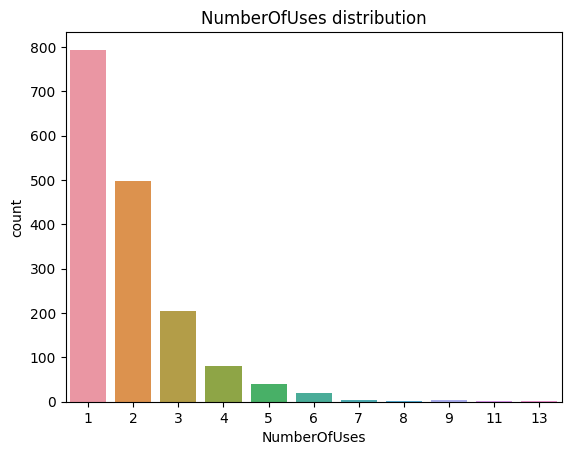

In [18]:
use_type = [elem for elem in data.columns if 'UseType' in elem and 'GFA' not in elem]
display(data[[elem for elem in data.columns if 'Primary' in elem ] + use_type].head())
use_type_list = tbx.split_words(data, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usage unique : {}".format(len(use_type_list)))

# On calcule le nombre d'usage par batiments
data['NumberOfUses'] = [str(word).count(",") + 1 for word in data['ListOfAllPropertyUseTypes'].str.split(',')]

# On plot
sns.countplot(data=data, x='NumberOfUses')
plt.title('NumberOfUses distribution')
plt.show()

### Les sources d'énergie

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)
0            7226362.5      2003882.00          3946027.0         1276453.0
1            8387933.0            0.00          3242851.0         5145082.0
2           72587024.0     21566554.00         49526664.0         1493800.0
3            6794584.0      2214446.25          2768924.0         1811213.0
4           14172606.0            0.00          5368607.0         8803998.0

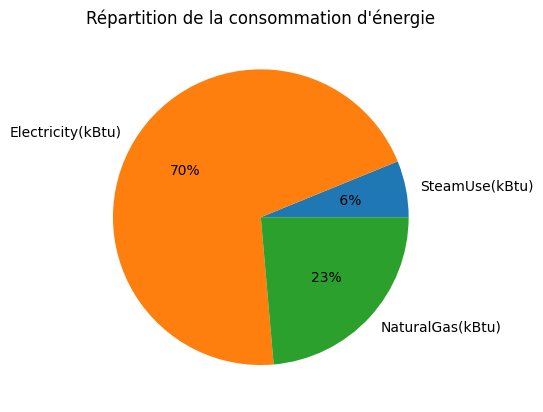

SteamUse_Perc  Electricity_Perc  NaturalGas_Perc
0          27.73             54.61            17.66
1           0.00             38.66            61.34
2          29.71             68.23             2.06
3          32.59             40.75            26.66
4           0.00             37.88            62.12

In [19]:
energy_data = [elem for elem in data.columns if 'kBtu' in elem]
display(data[energy_data].head())
energy_source_data = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

# repartition des sources d'energie
data[energy_source_data].sum().plot(kind='pie', autopct=lambda x:'{:2d}'.format(int(x)) + '%',title='''Répartition de la consommation d'énergie''')
plt.show()

# On calcule la part des sources d'energie
data['SteamUse_Perc'] = data.apply(lambda x: x['SteamUse(kBtu)'] / x['SiteEnergyUse(kBtu)']\
                                   if x['SiteEnergyUse(kBtu)'] != 0 else np.nan, axis=1)
data['Electricity_Perc'] = data.apply(lambda x: x['Electricity(kBtu)'] / x['SiteEnergyUse(kBtu)']\
                                   if x['SiteEnergyUse(kBtu)'] != 0 else np.nan, axis=1)
data['NaturalGas_Perc'] = data.apply(lambda x: x['NaturalGas(kBtu)'] / x['SiteEnergyUse(kBtu)']\
                                   if x['SiteEnergyUse(kBtu)'] != 0 else np.nan, axis=1)

data['SteamUse_Perc'] = data.apply(lambda x: round((x['SteamUse_Perc']),4)*100, axis=1)
data['Electricity_Perc'] = data.apply(lambda x: round((x['Electricity_Perc']),4)*100, axis=1)
data['NaturalGas_Perc'] = data.apply(lambda x: round((x['NaturalGas_Perc']),4)*100, axis=1)

data[[elem for elem in data.columns if '_Perc' in elem]].head()

In [20]:
energy_data.remove('SiteEnergyUse(kBtu)')
useless_columns_2 = useless_columns_2  + use_type + energy_data
useless_columns_2

['DataYear',
 'YearBuilt',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)']

In [21]:
useless_columns_2.remove('LargestPropertyUseType')

## Data Cleaning 2

In [22]:
data[useless_columns_2].head()

DataYear  YearBuilt  PropertyGFAParking  PropertyGFABuilding(s)  \
0      2016       1927                   0                   88434   
1      2016       1996               15064                   88502   
2      2016       1969              196718                  759392   
3      2016       1926                   0                   61320   
4      2016       1980               62000                  113580   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                          68009.0                             0.0   

       ListOfAllPropertyUseTypes SecondLargestPropertyUseType  \
0                          Hotel                          NaN   
1     Hotel, Parking, Restaurant                      Parking   
2                          Hotel                          NaN   
3                          Hotel                          NaN   
4  Hotel, Parking, Swimming Pool                      Parking   

  ThirdLargestPropertyUseType  SteamUse(kBtu)  Electricity(kBtu)  \
0                         NaN      2003882.00          3946027.0   
1                  Restaurant            0.00          3242851.0   
2                         NaN     21566554.00         49526664.0   
3                         NaN      2214446.25          2768924.0   
4               Swimming Pool            0.00          5368607.0   

   NaturalGas(kBtu)  
0         1276453.0  
1         5145082.0  
2         1493800.0  
3         1811213.0  
4         8803998.0

In [23]:
data.drop(useless_columns_2, axis=1, inplace=True)

In [24]:
useless_columns_2

['DataYear',
 'YearBuilt',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)']

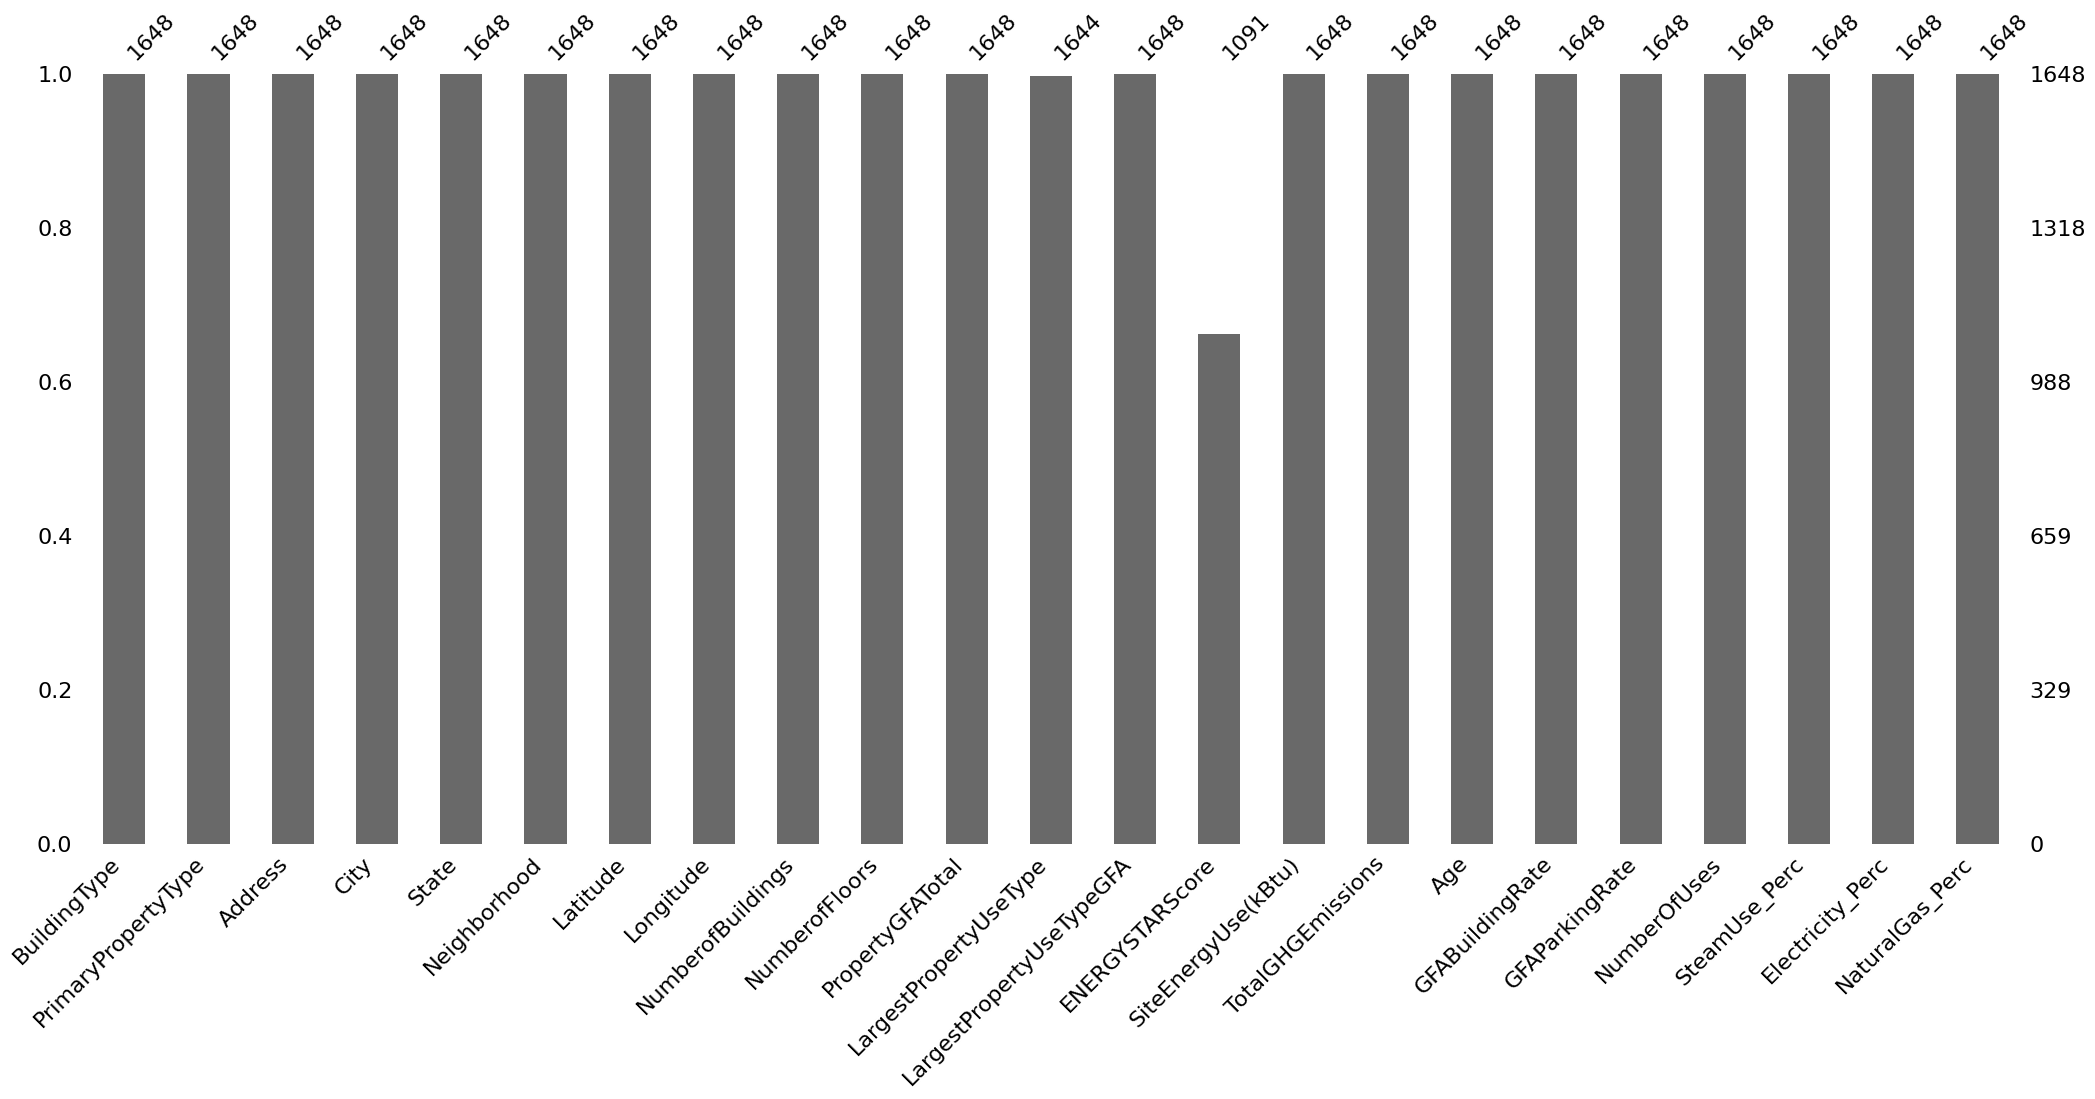

In [25]:
msno.bar(data)
plt.show()

## Data Exploration

In [26]:
numerical_features = list(data.select_dtypes(include=["float64","int64"]).columns)
categorical_features = [x for x in data.columns if x not in numerical_features ]

### Situation géographique des batiments

In [27]:
geo_data = ['Address', 'City', 'State','Neighborhood', 'Latitude', 'Longitude']


import folium

m = folium.Map()
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],
               zoom_start=11)
for i in range(0,len(data)):
    folium.Circle([data.iloc[i]['Latitude'],data.iloc[i]['Longitude']], popup=data.iloc[i]['Address'], radius =100).add_to(m)
m

### Les variabes numériques

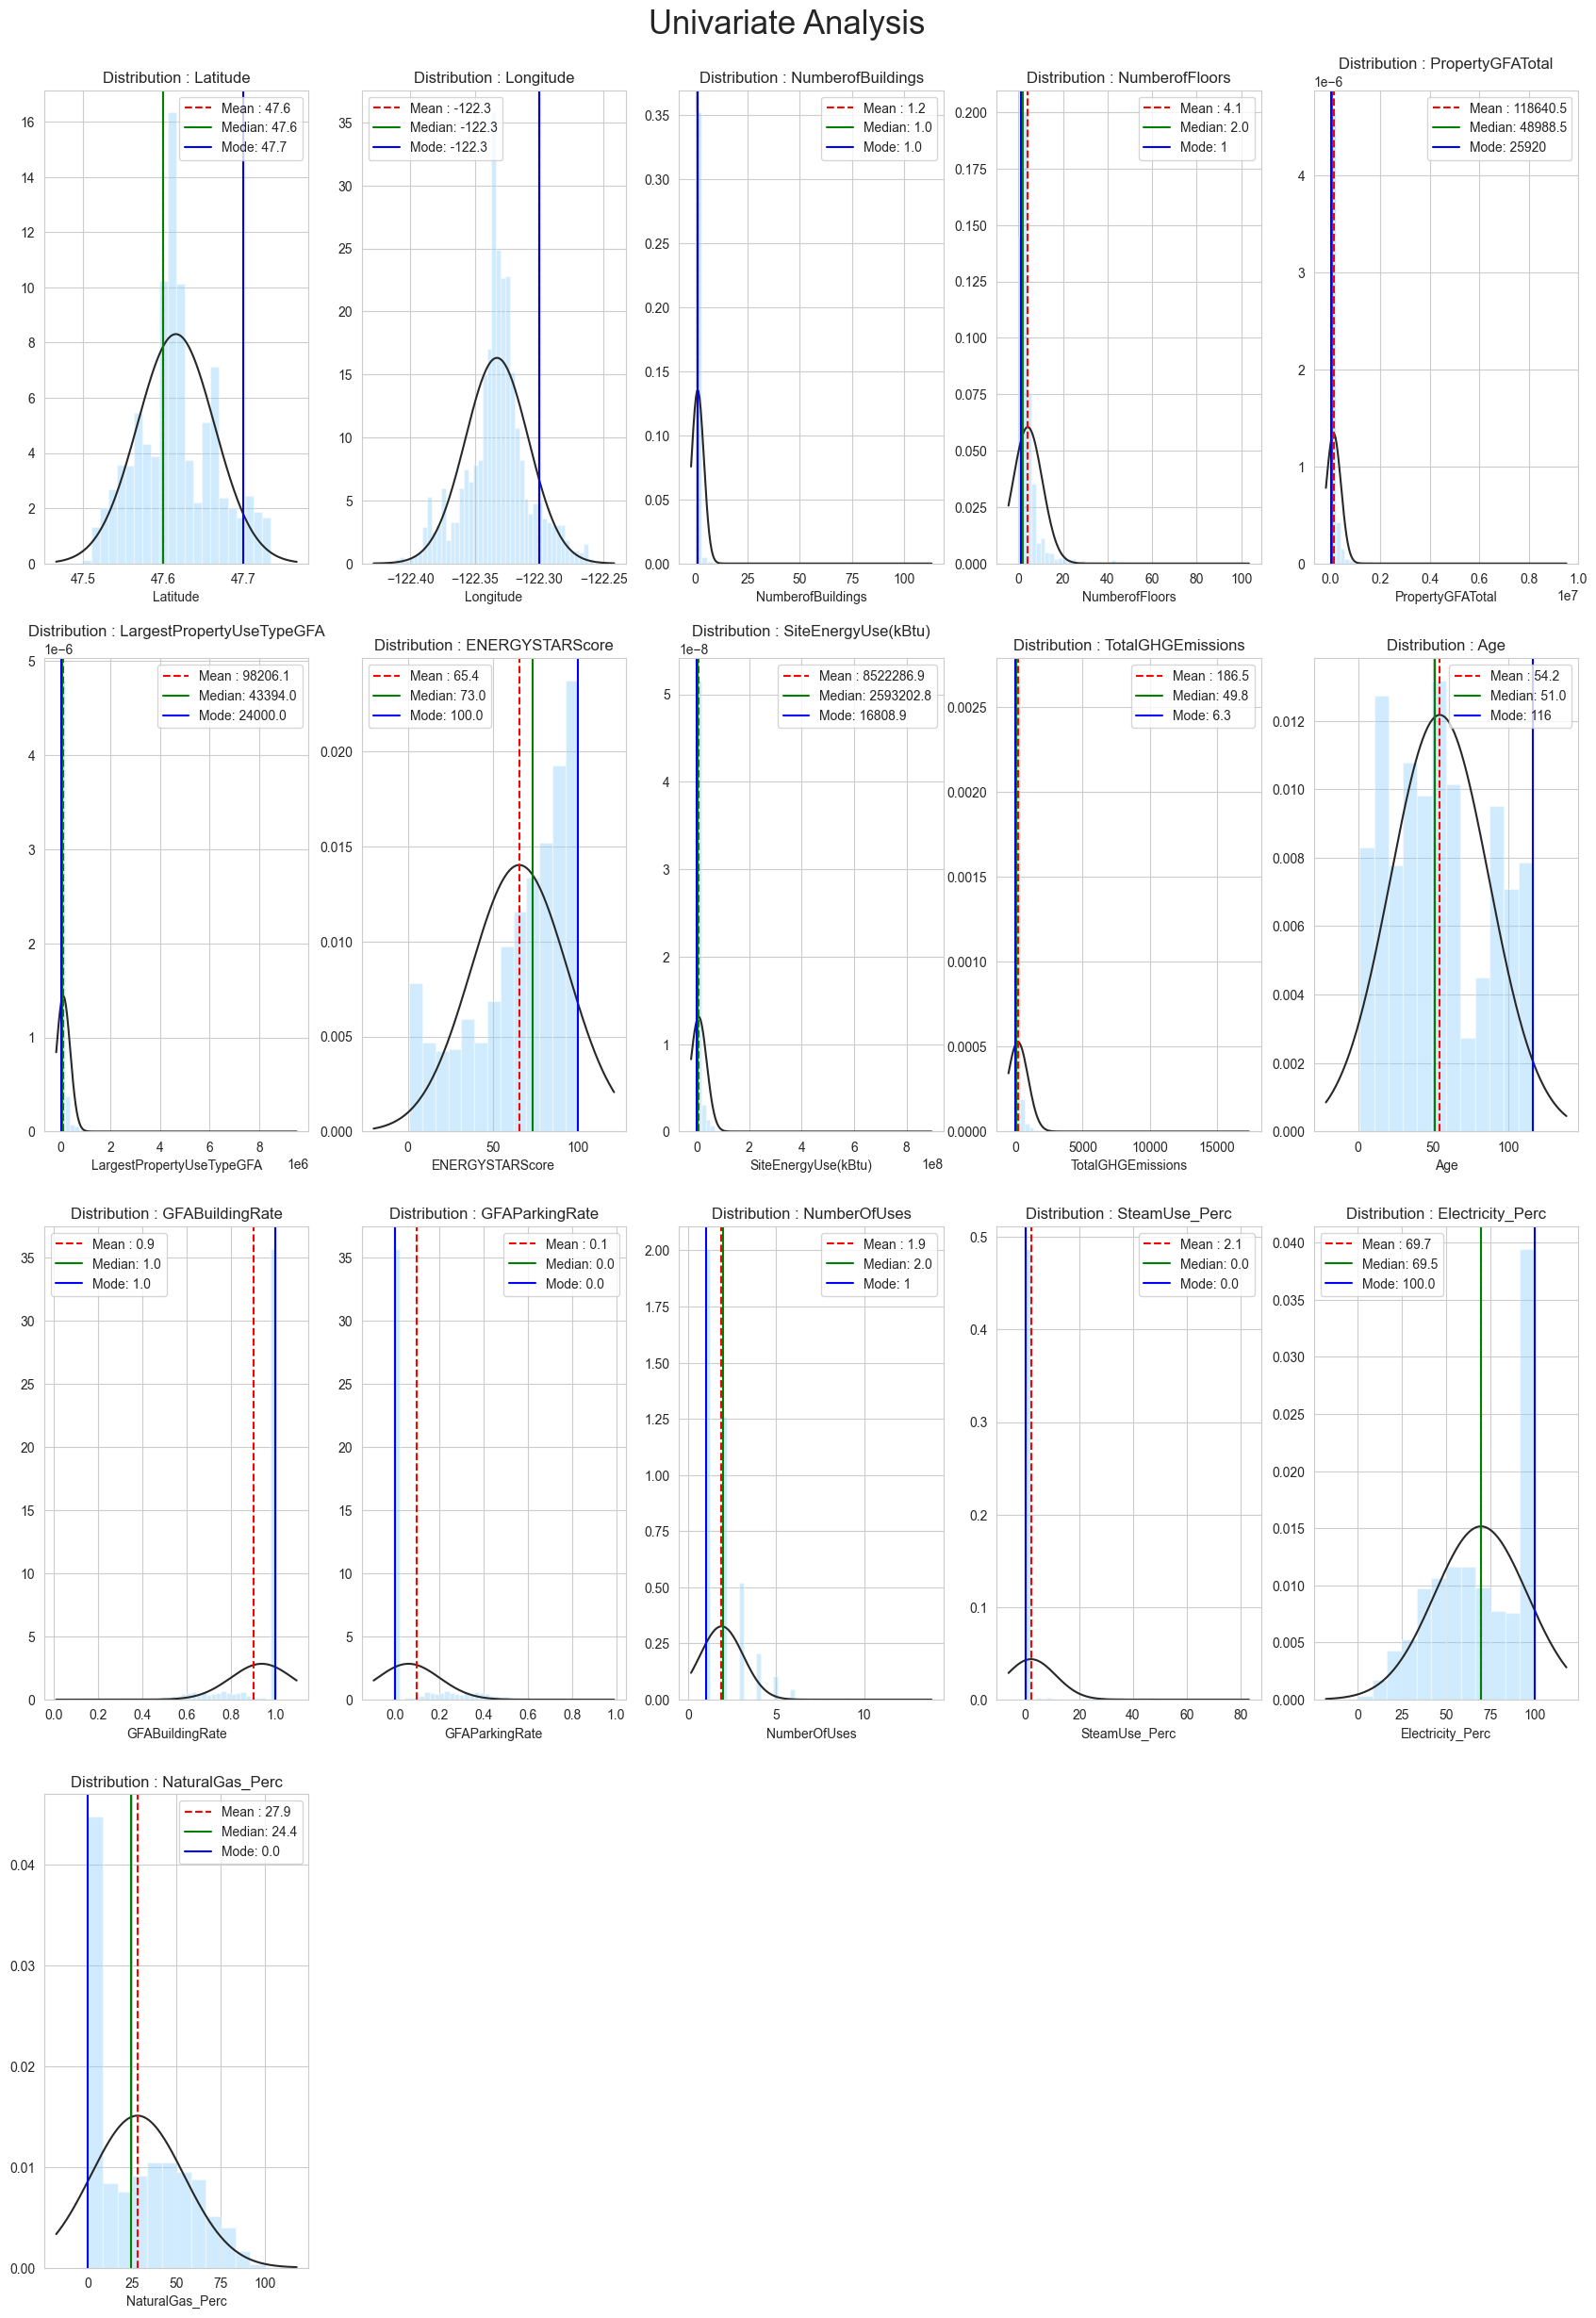

In [28]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
fig.text(0.5, 0.90, "Univariate Analysis", ha="center", fontsize=25 )
#sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,5,i+1)
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    mean = round(data[colonne].mean(), 1)
    median = round(data[colonne].median(),1)
    mode = round(data[colonne].mode()[0],1)
    ax = sns.distplot(data[colonne], fit=st.norm, kde=False, color='LightSkyBlue', )
    ax.set_title("Distribution : {}".format(colonne))
    ax.axvline(mean, color='r', linestyle='--', label='Mean : {}'.format(mean))
    ax.axvline(median, color='g', linestyle='-',label='Median: {}'.format(median))
    ax.axvline(mode, color='b', linestyle='-', label='Mode: {}'.format(mode))
    ax.legend()
    #sub += 1
plt.show()

In [29]:
def switch_log(columns):
    # on passe au log les variables sélectionnées dans columns
    for column in columns:
        col_name = str(column + '_log')
        shift = 1 - data[column].min()
        data[col_name] = data[column].apply(lambda x: np.log(x + shift))
        #data.drop(column, axis = 1, inplace = True)
switch_log(numerical_features)

In [30]:
data

BuildingType PrimaryPropertyType           Address     City State  \
0         NonResidential               Hotel     405 Olive way  Seattle    WA   
1         NonResidential               Hotel   724 Pine street  Seattle    WA   
2         NonResidential               Hotel   1900 5th Avenue  Seattle    WA   
3         NonResidential               Hotel    620 STEWART ST  Seattle    WA   
4         NonResidential               Hotel     401 LENORA ST  Seattle    WA   
...                  ...                 ...               ...      ...   ...   
3371  Nonresidential COS              Office  1600 S Dakota St  Seattle    WA   
3372  Nonresidential COS               Other     719 8th Ave S  Seattle    WA   
3373  Nonresidential COS               Other    1920 1st Ave W  Seattle    WA   
3374  Nonresidential COS  Mixed Use Property    8319 8th Ave S  Seattle    WA   
3375  Nonresidential COS  Mixed Use Property  2820 S Myrtle St  Seattle    WA   

               Neighborhood  Latitude  Longitude  NumberofBuildings  \
0                  DOWNTOWN  47.61220 -122.33799                1.0   
1                  DOWNTOWN  47.61317 -122.33393                1.0   
2                  DOWNTOWN  47.61393 -122.33810                1.0   
3                  DOWNTOWN  47.61412 -122.33664                1.0   
4                  DOWNTOWN  47.61375 -122.34047                1.0   
...                     ...       ...        ...                ...   
3371       GREATER DUWAMISH  47.56722 -122.31154                1.0   
3372               DOWNTOWN  47.59625 -122.32283                1.0   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784                1.0   
3374       GREATER DUWAMISH  47.52832 -122.32431                1.0   
3375       GREATER DUWAMISH  47.53939 -122.29536                1.0   

      NumberofFloors  ...  ENERGYSTARScore_log SiteEnergyUse(kBtu)_log  \
0                 12  ...             4.094345               15.790918   
1                 11  ...             4.110874               15.940299   
2                 41  ...             3.761200               18.100065   
3                 10  ...             4.025352               15.729160   
4                 18  ...             4.317488               16.465635   
...              ...  ...                  ...                     ...   
3371               1  ...             3.828641               13.632714   
3372               1  ...                  NaN               13.746662   
3373               1  ...                  NaN               15.564552   
3374               1  ...                  NaN               13.462633   
3375               1  ...                  NaN               13.943102   

      TotalGHGEmissions_log   Age_log  GFABuildingRate_log  \
0                  5.524895  4.488636             0.639219   
1                  5.692856  2.995732             0.559330   
2                  7.644996  3.850148             0.524314   
3                  5.660562  4.499810             0.639219   
4                  6.226319  3.583519             0.433015   
...                     ...       ...                  ...   
3371               3.082827  3.258097             0.639219   
3372               3.498022  2.484907             0.639219   
3373               5.413519  3.737670             0.639219   
3374               3.135059  3.295837             0.639219   
3375               3.741235  4.356709             0.639219   

      GFAParkingRate_log  NumberOfUses_log  SteamUse_Perc_log  \
0               0.000000          0.000000           3.357942   
1               0.135841          1.098612           0.000000   
2               0.187060          0.000000           3.424588   
3               0.000000          0.000000           3.514228   
4               0.302398          1.098612           0.000000   
...                  ...               ...                ...   
3371            0.000000          0.000000           0.000000   
3372            0.000000        

In [31]:
numerical_features_log = [elem for elem in data.columns if '_log' in elem]

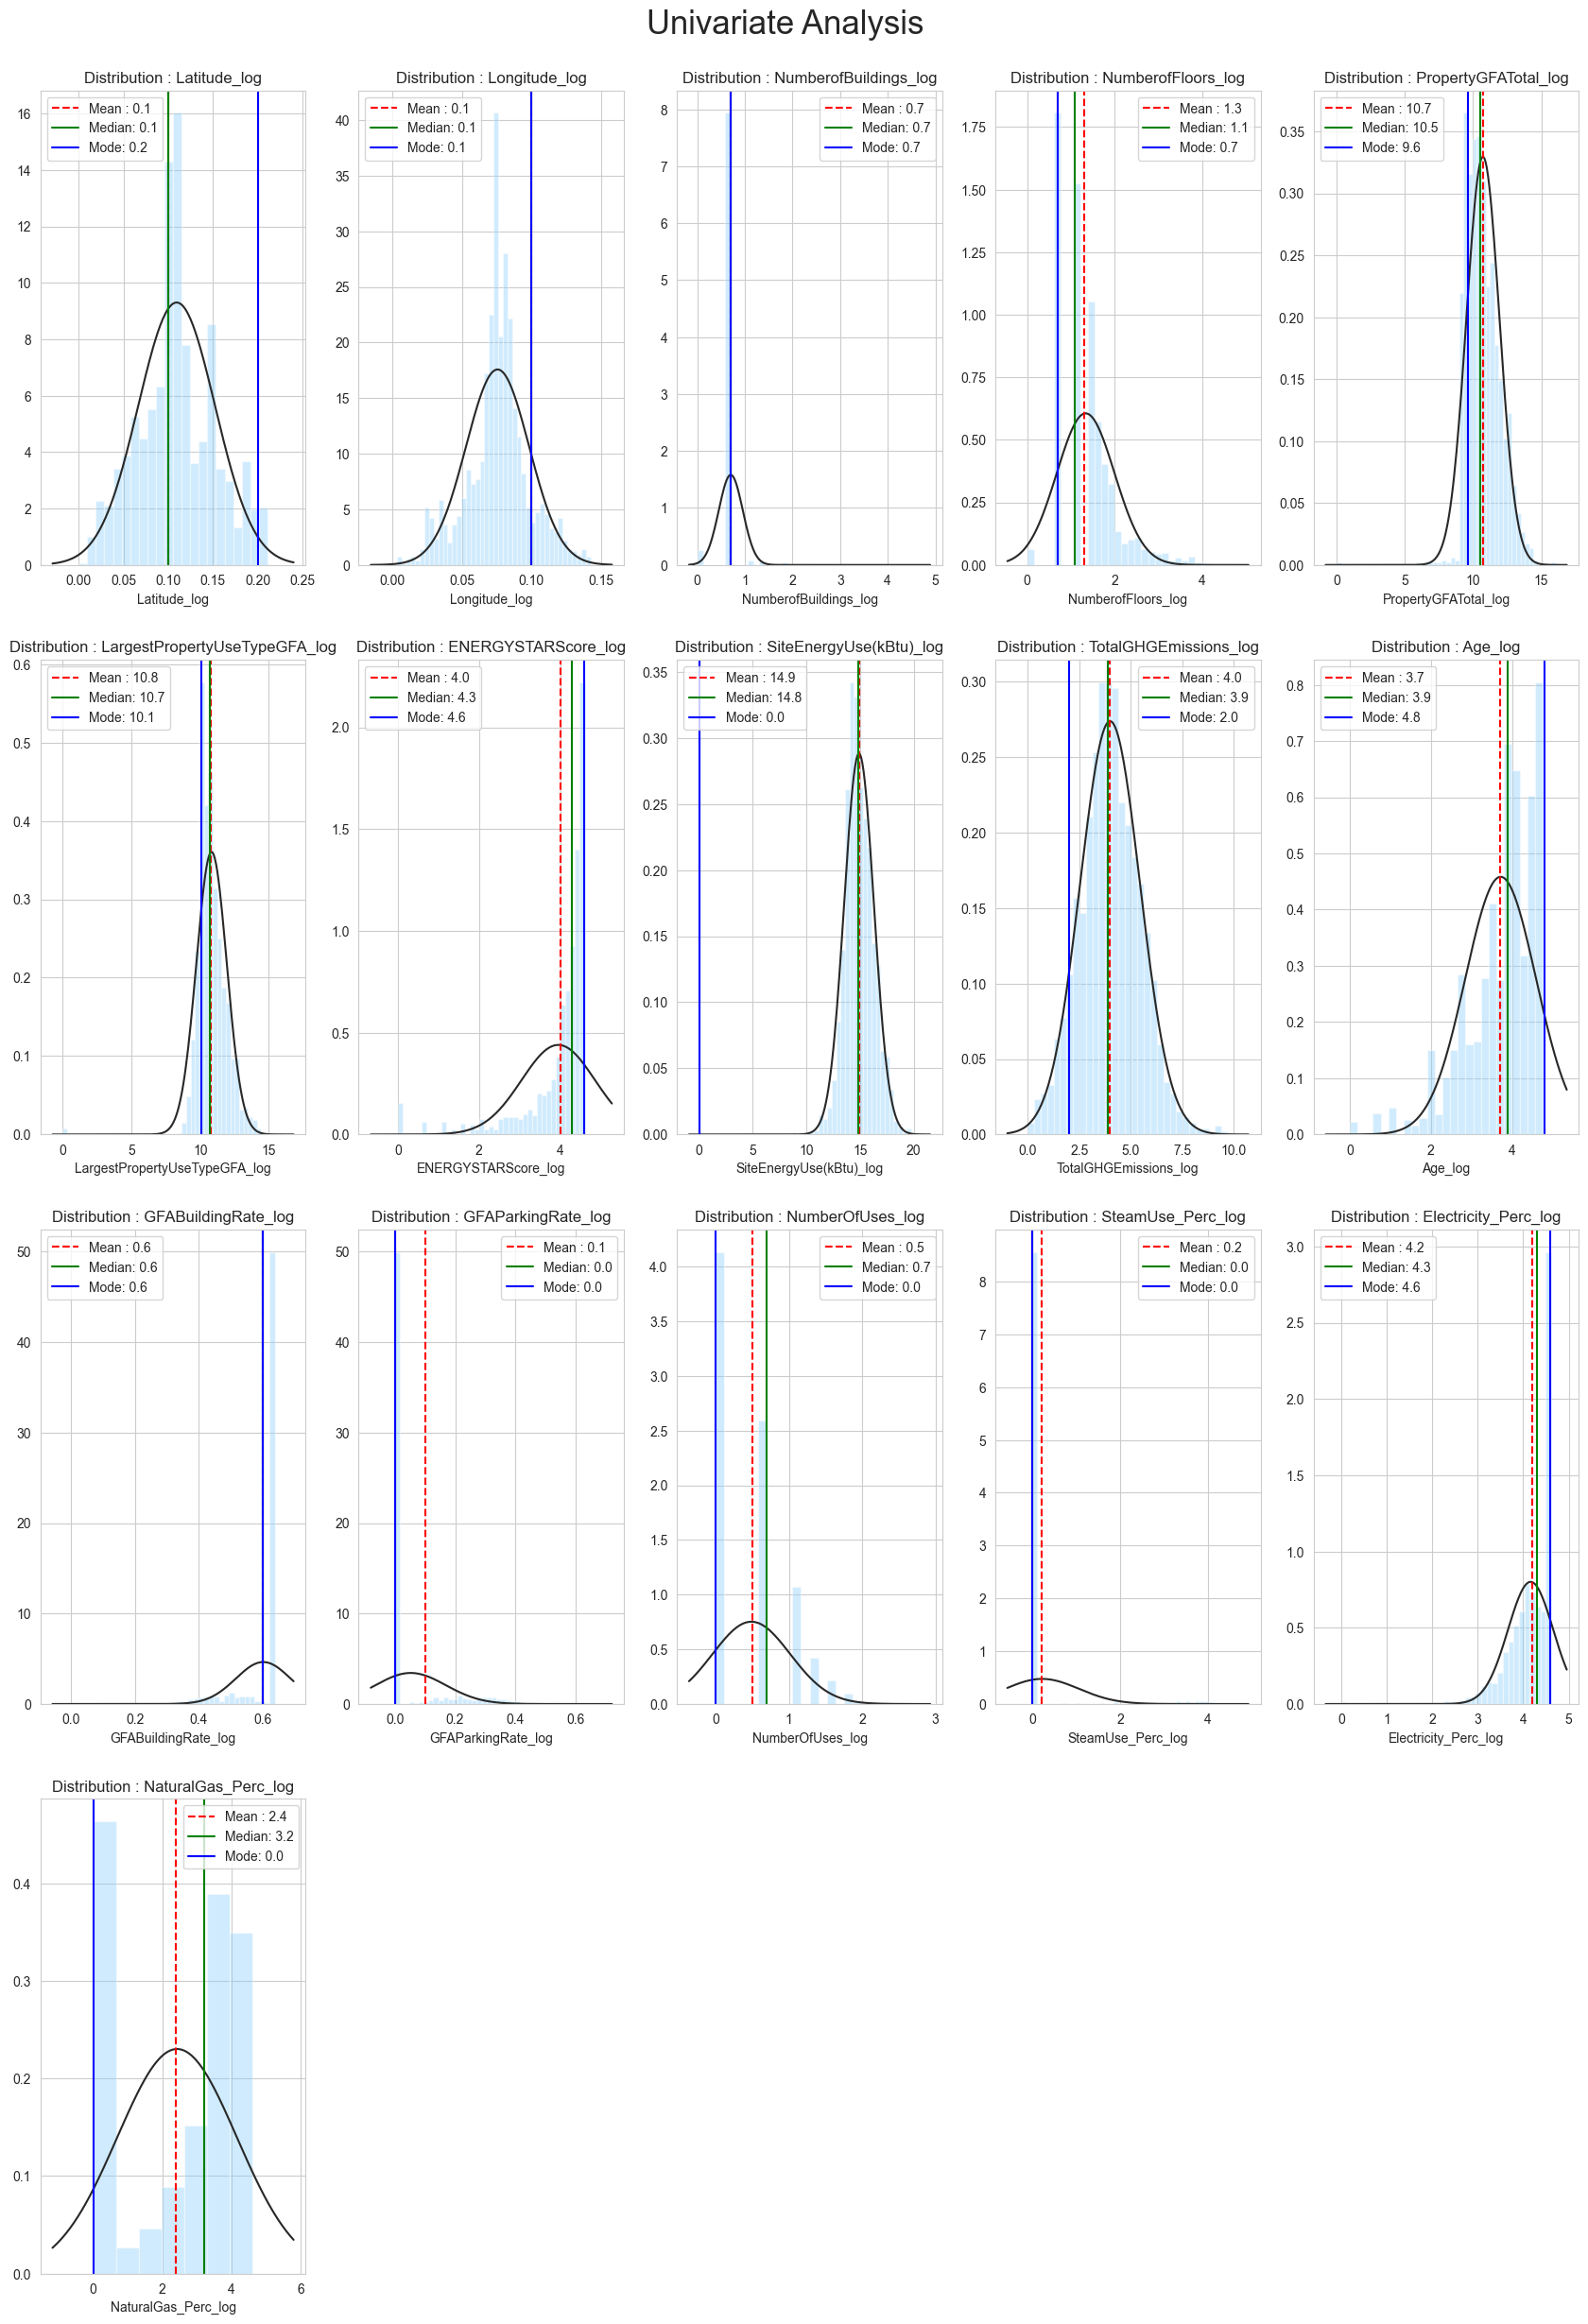

In [32]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
fig.text(0.5, 0.90, "Univariate Analysis", ha="center", fontsize=25 )
#sub = 0
for i in range(len(numerical_features_log)):
    fig.add_subplot(4,5,i+1)
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features_log[i]
    mean = round(data[colonne].mean(), 1)
    median = round(data[colonne].median(),1)
    mode = round(data[colonne].mode()[0],1)
    ax = sns.distplot(data[colonne], fit=st.norm, kde=False, color='LightSkyBlue', )
    ax.set_title("Distribution : {}".format(colonne))
    ax.axvline(mean, color='r', linestyle='--', label='Mean : {}'.format(mean))
    ax.axvline(median, color='g', linestyle='-',label='Median: {}'.format(median))
    ax.axvline(mode, color='b', linestyle='-', label='Mode: {}'.format(mode))
    ax.legend()
    #sub += 1
plt.show()

### Les variables catégoriques

In [33]:
data[categorical_features].head()

BuildingType PrimaryPropertyType          Address     City State  \
0  NonResidential               Hotel    405 Olive way  Seattle    WA   
1  NonResidential               Hotel  724 Pine street  Seattle    WA   
2  NonResidential               Hotel  1900 5th Avenue  Seattle    WA   
3  NonResidential               Hotel   620 STEWART ST  Seattle    WA   
4  NonResidential               Hotel    401 LENORA ST  Seattle    WA   

  Neighborhood LargestPropertyUseType  
0     DOWNTOWN                  Hotel  
1     DOWNTOWN                  Hotel  
2     DOWNTOWN                  Hotel  
3     DOWNTOWN                  Hotel  
4     DOWNTOWN                  Hotel

In [34]:
for elem in ['Address', 'City', 'State']:
    categorical_features.remove(elem)

In [35]:
categorical_features

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType']

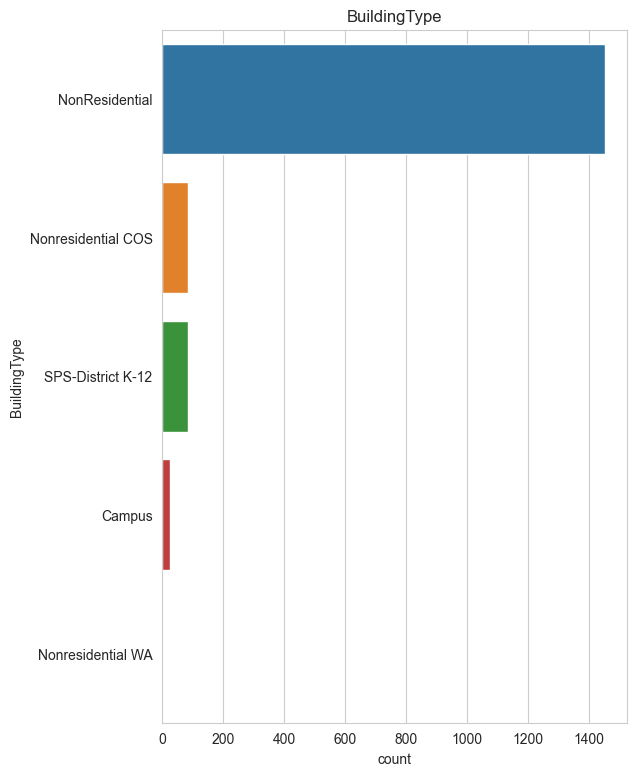

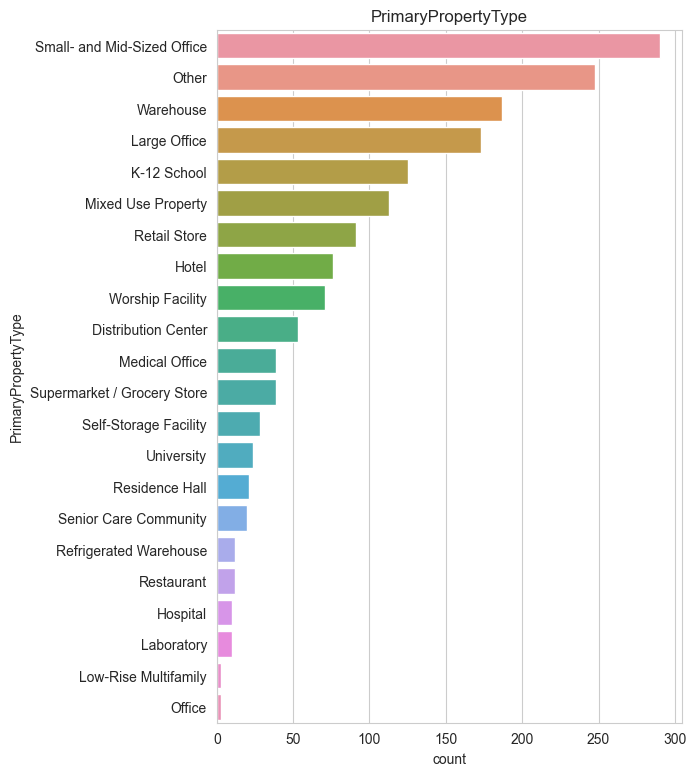

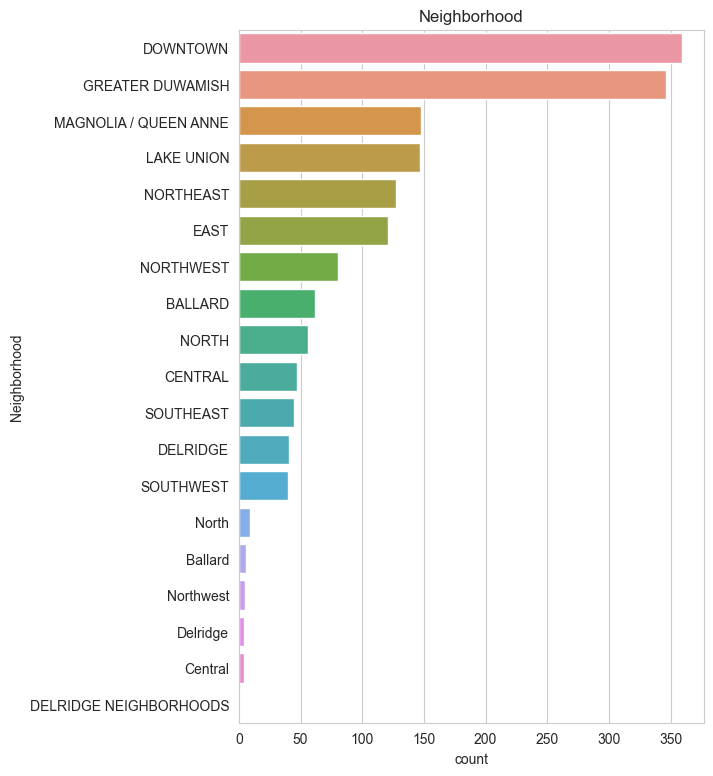

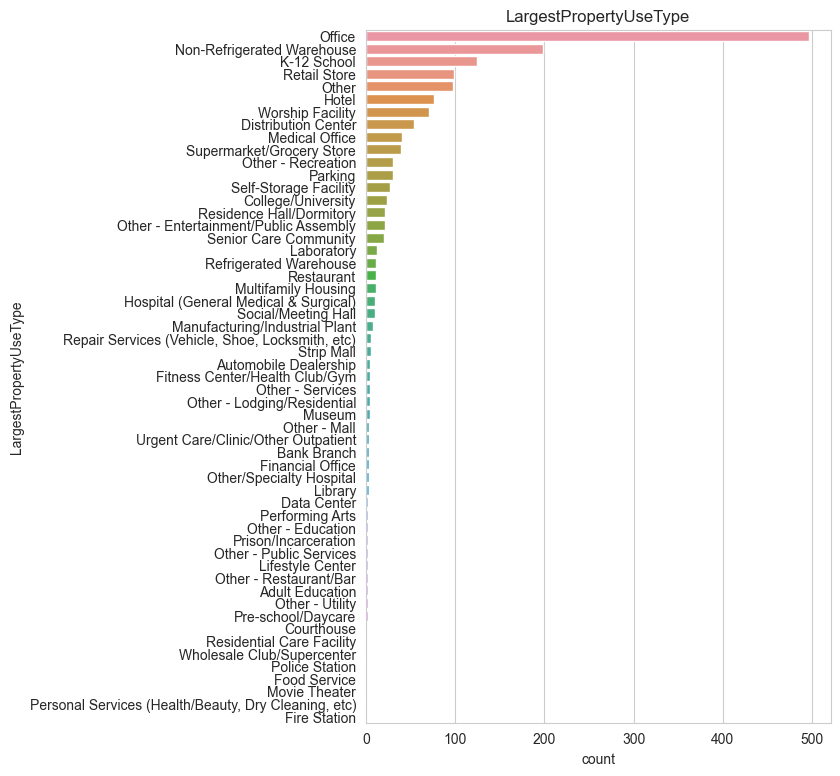

In [36]:
for elem in categorical_features:
    plt.figure(figsize=(6,9))
    plt.title(elem)
    sns.countplot(data=data, y=elem, order=data[elem].value_counts().index)
    plt.show()

In [37]:
display(data[data['PrimaryPropertyType']=='Low-Rise Multifamily'])



BuildingType   PrimaryPropertyType             Address     City State  \
644   NonResidential  Low-Rise Multifamily  2108 N Pacific St.  Seattle    WA   
1300          Campus  Low-Rise Multifamily   1525 FIrst Avenue  Seattle    WA   
2450  NonResidential  Low-Rise Multifamily       916 E PIKE ST  Seattle    WA   

     Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
644    LAKE UNION  47.64859 -122.33311                1.0               3   
1300     DOWNTOWN  47.60918 -122.34079                1.0               4   
2450         EAST  47.61427 -122.31977                1.0               3   

      ...  ENERGYSTARScore_log SiteEnergyUse(kBtu)_log  TotalGHGEmissions_log  \
644   ...             3.465736               14.498796               3.276390   
1300  ...                  NaN               15.140341               3.303952   
2450  ...                  NaN               11.422919               1.808289   

       Age_log  GFABuildingRate_log  GFAParkingRate_log  NumberOfUses_log  \
644   2.772589             0.410254             0.32772          0.000000   
1300  4.304065             0.639219             0.00000          1.791759   
2450  4.663439             0.639219             0.00000          0.693147   

      SteamUse_Perc_log  Electricity_Perc_log  NaturalGas_Perc_log  
644                 0.0              4.481080             2.615204  
1300                0.0              4.615121             0.000000  
2450                0.0              2.443216             4.505239  

[3 rows x 39 columns]

In [38]:
data[data['PrimaryPropertyType']=='Low-Rise Multifamily']

BuildingType   PrimaryPropertyType             Address     City State  \
644   NonResidential  Low-Rise Multifamily  2108 N Pacific St.  Seattle    WA   
1300          Campus  Low-Rise Multifamily   1525 FIrst Avenue  Seattle    WA   
2450  NonResidential  Low-Rise Multifamily       916 E PIKE ST  Seattle    WA   

     Neighborhood  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
644    LAKE UNION  47.64859 -122.33311                1.0               3   
1300     DOWNTOWN  47.60918 -122.34079                1.0               4   
2450         EAST  47.61427 -122.31977                1.0               3   

      ...  ENERGYSTARScore_log SiteEnergyUse(kBtu)_log  TotalGHGEmissions_log  \
644   ...             3.465736               14.498796               3.276390   
1300  ...                  NaN               15.140341               3.303952   
2450  ...                  NaN               11.422919               1.808289   

       Age_log  GFABuildingRate_log  GFAParkingRate_log  NumberOfUses_log  \
644   2.772589             0.410254             0.32772          0.000000   
1300  4.304065             0.639219             0.00000          1.791759   
2450  4.663439             0.639219             0.00000          0.693147   

      SteamUse_Perc_log  Electricity_Perc_log  NaturalGas_Perc_log  
644                 0.0              4.481080             2.615204  
1300                0.0              4.615121             0.000000  
2450                0.0              2.443216             4.505239  

[3 rows x 39 columns]

In [39]:
# On supprime les batiments dont le primary property residentiel et le nombre d'utilisation est 1
data = data[~((data['PrimaryPropertyType']=='Low-Rise Multifamily') & (data['NumberOfUses']<2))]

In [40]:
print('Use types list : ',df[df.index==2450]['ListOfAllPropertyUseTypes'])
print('Use types list : ',df[df.index==1300]['ListOfAllPropertyUseTypes'])

Use types list :  2450    Bar/Nightclub, Multifamily Housing
Name: ListOfAllPropertyUseTypes, dtype: object
Use types list :  1300    Bar/Nightclub, Food Sales, Multifamily Housing...
Name: ListOfAllPropertyUseTypes, dtype: object


In [41]:
data['PrimaryPropertyType'][data.index==2450] = 'Bar/Nightclub'
data['PrimaryPropertyType'][data.index==1300] = 'Bar/Nightclub'

<AxesSubplot: xlabel='count', ylabel='PrimaryPropertyType'>

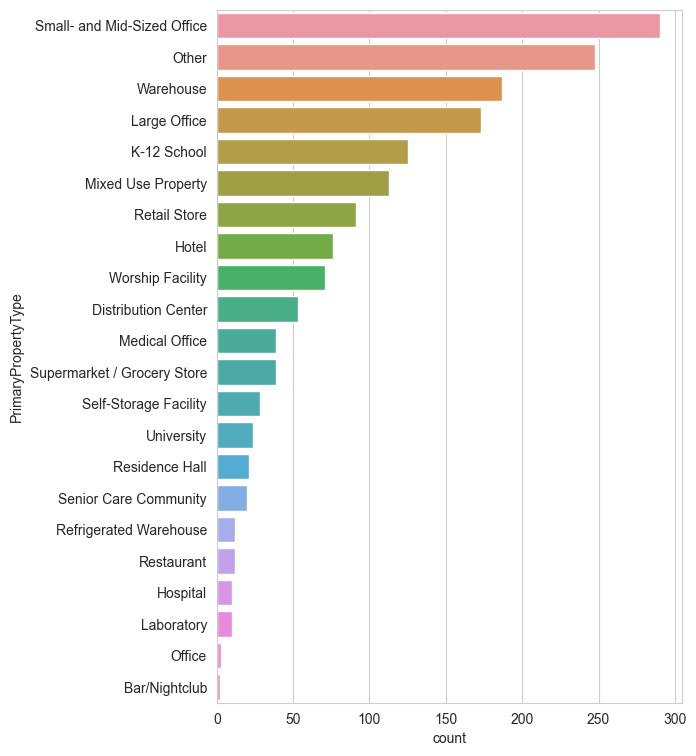

In [42]:
plt.figure(figsize=(6,9))
sns.countplot(data=data, y='PrimaryPropertyType', order=data['PrimaryPropertyType'].value_counts().index)

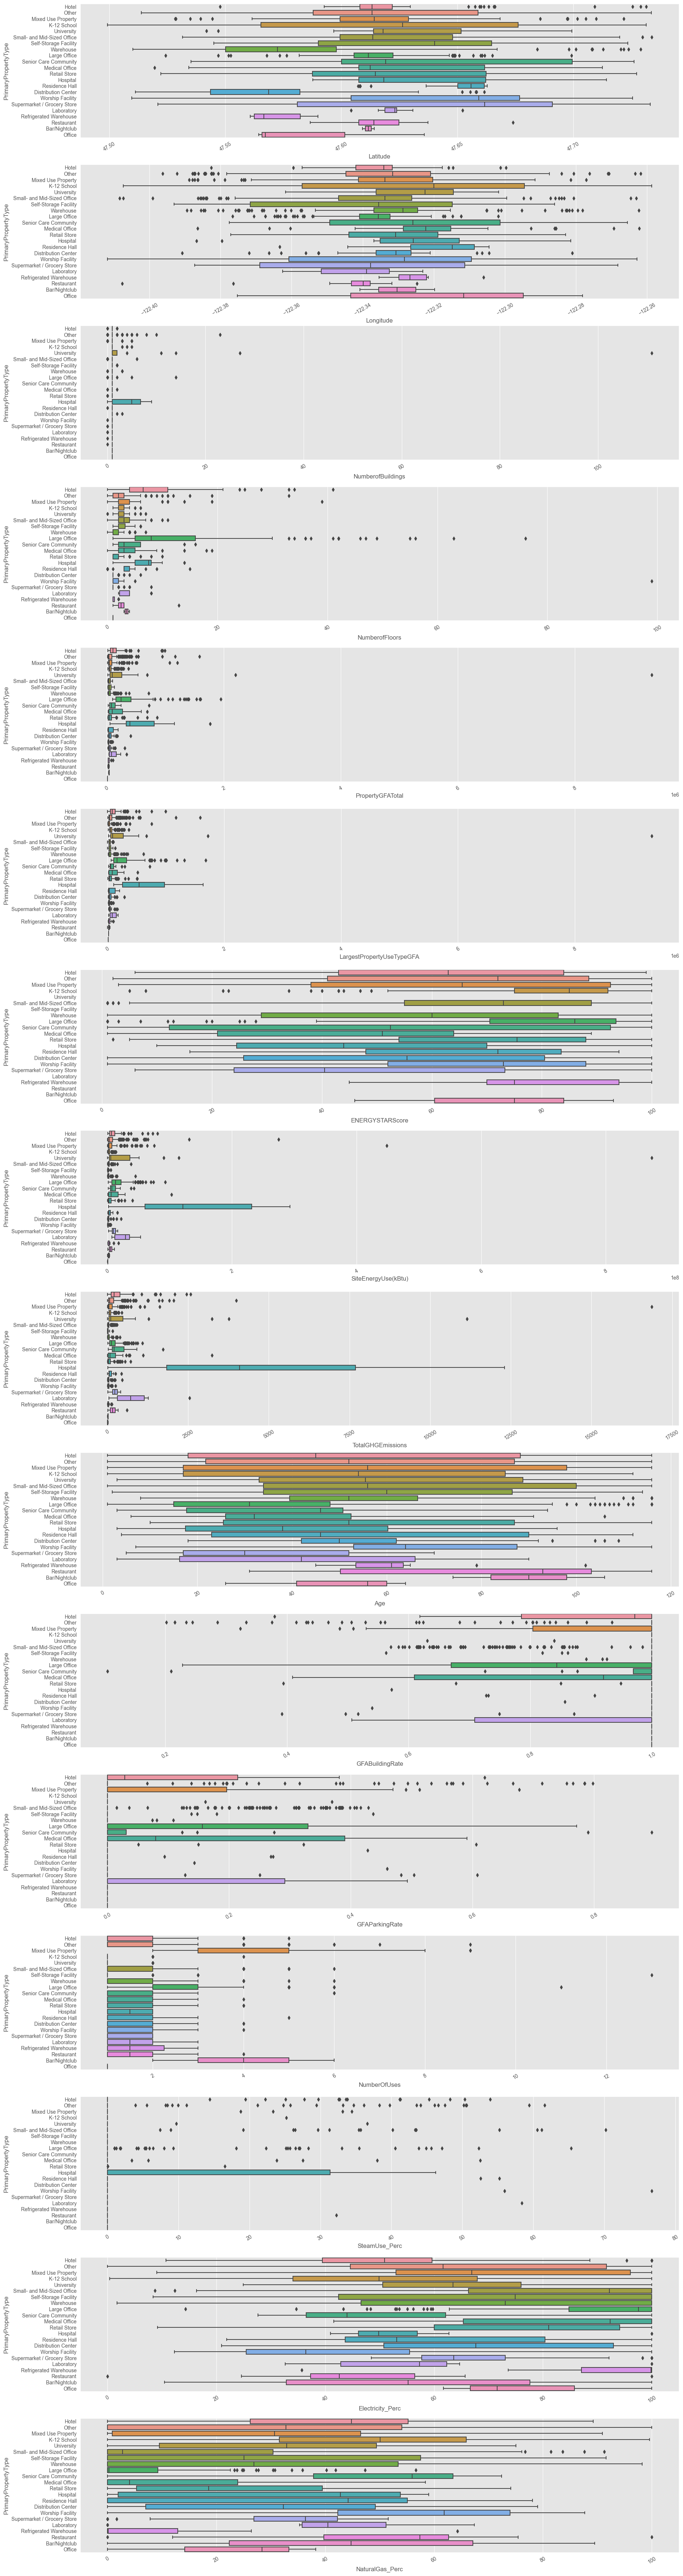

In [43]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,90))
#fig.text(0.5, 0.9, r"Distribution des variables nummériques par PrimaryPropertyType", ha="center", fontsize=16)
sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(len(numerical_features),1,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(y="PrimaryPropertyType", x=colonne, data=data)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

plt.show()

In [44]:
# Restaurant/Bar/Nightclub
data['PrimaryPropertyType'].replace('Bar/Nightclub', 'Restaurant/Bar/Nightclub', inplace=True)
data['PrimaryPropertyType'].replace('Restaurant', 'Restaurant/Bar/Nightclub', inplace=True)

# School/University
#data['PrimaryPropertyType'].replace('University', 'School/University', inplace=True)
#data['PrimaryPropertyType'].replace('K-12 School', 'School/University', inplace=True)

# Office
data['PrimaryPropertyType'].replace('Medical Office', 'Office/Medical_Office/Laboratory', inplace=True)
data['PrimaryPropertyType'].replace('Laboratory', 'Office/Medical_Office/Laboratory', inplace=True)
data['PrimaryPropertyType'].replace('Office', 'Office/Medical_Office/Laboratory', inplace=True)



<AxesSubplot: xlabel='count', ylabel='PrimaryPropertyType'>

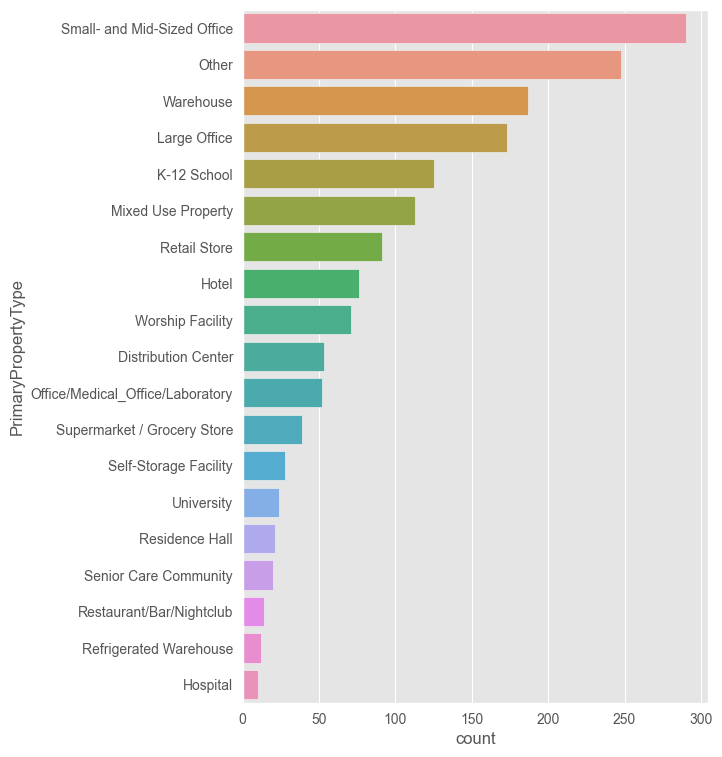

In [45]:
plt.figure(figsize=(6,9))
sns.countplot(data=data, y='PrimaryPropertyType', order=data['PrimaryPropertyType'].value_counts().index)

In [46]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'City', 'State',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'Age', 'GFABuildingRate', 'GFAParkingRate',
       'NumberOfUses', 'SteamUse_Perc', 'Electricity_Perc', 'NaturalGas_Perc',
       'Latitude_log', 'Longitude_log', 'NumberofBuildings_log',
       'NumberofFloors_log', 'PropertyGFATotal_log',
       'LargestPropertyUseTypeGFA_log', 'ENERGYSTARScore_log',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 'Age_log',
       'GFABuildingRate_log', 'GFAParkingRate_log', 'NumberOfUses_log',
       'SteamUse_Perc_log', 'Electricity_Perc_log', 'NaturalGas_Perc_log'],
      dtype='object')

In [47]:
conso_moyenne = data.groupby('PrimaryPropertyType').agg({'SiteEnergyUse(kBtu)':'mean', 'TotalGHGEmissions':'mean'}).sort_values('TotalGHGEmissions', ascending=False).reset_index()
conso_moyenne

PrimaryPropertyType  SiteEnergyUse(kBtu)  TotalGHGEmissions
0                           Hospital         1.415470e+08        5052.963000
1                         University         5.520607e+07         961.887500
2                              Hotel         1.193897e+07         383.528816
3              Senior Care Community         1.151729e+07         371.899500
4   Office/Medical_Office/Laboratory         1.406858e+07         360.436731
5                 Mixed Use Property         1.203002e+07         306.340088
6        Supermarket / Grocery Store         1.003563e+07         228.301282
7                       Large Office         1.761539e+07         206.412312
8                              Other         9.122044e+06         195.516371
9           Restaurant/Bar/Nightclub         4.789524e+06         167.266429
10                    Residence Hall         3.810723e+06         101.265714
11                       K-12 School         3.076938e+06          92.892240
12                      Retail Store         4.694639e+06          88.940330
13               Distribution Center         2.405360e+06          50.225660
14                         Warehouse         1.961577e+06          42.494492
15                  Worship Facility         1.171907e+06          42.180704
16       Small- and Mid-Sized Office         2.639259e+06          40.619621
17            Refrigerated Warehouse         3.719428e+06          37.614167
18             Self-Storage Facility         9.321726e+05          24.098929

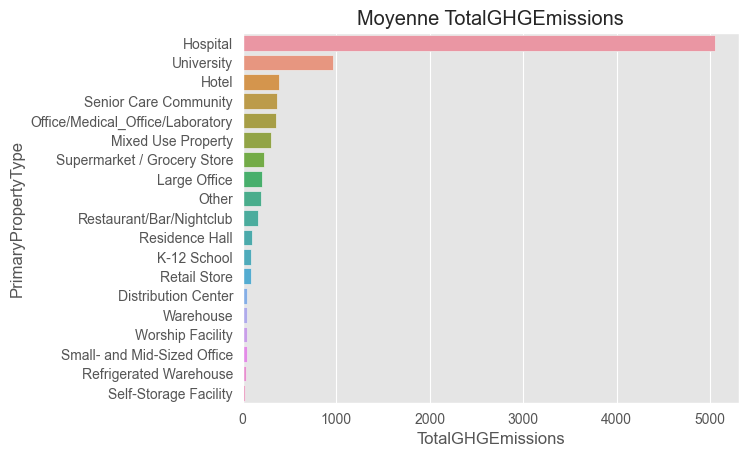

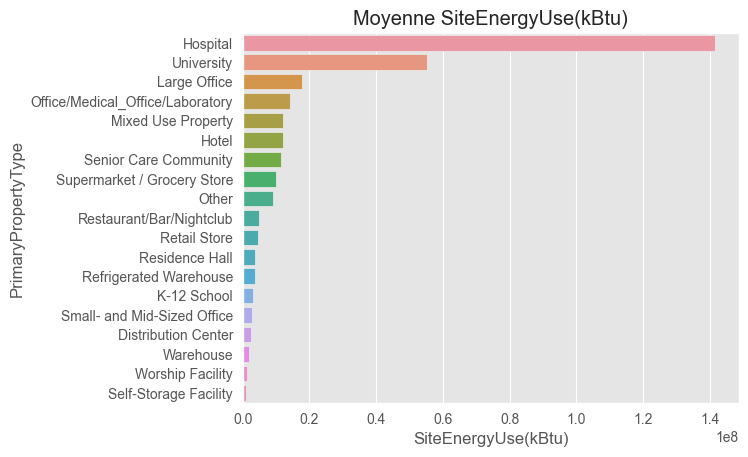

In [48]:
for elem in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']:
    plt.title('Moyenne {}'.format(elem))
    sns.barplot(data=conso_moyenne, x =elem, y='PrimaryPropertyType', order=conso_moyenne.sort_values(elem, ascending=False)['PrimaryPropertyType'].tolist())
    plt.show()

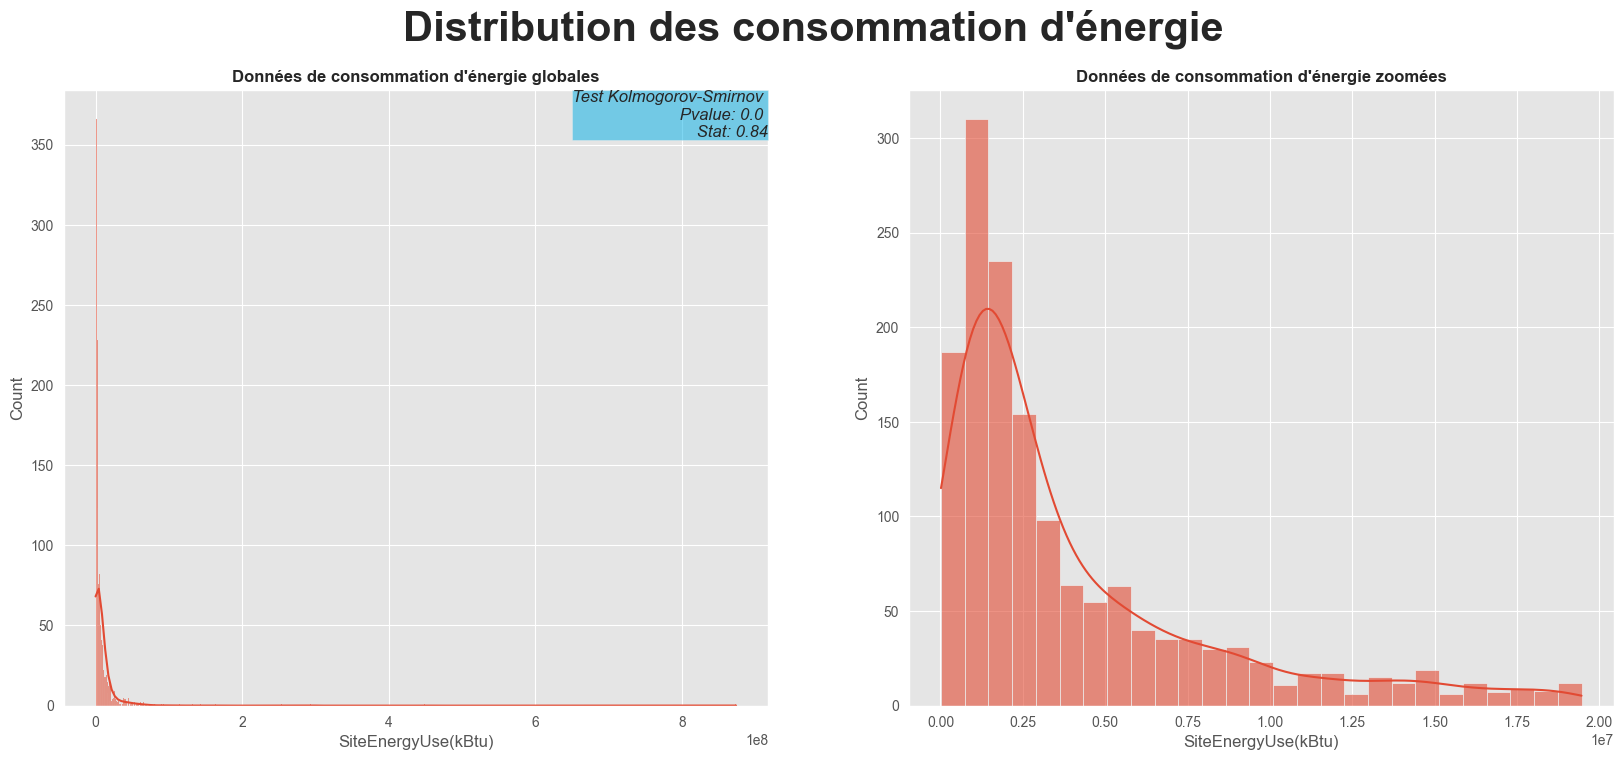

In [49]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", fontweight="bold", fontsize=12)

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['SiteEnergyUse(kBtu)']< 20000000.0)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1],  alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées",fontweight="bold", fontsize=12)

plt.suptitle("Distribution des consommation d'énergie", fontweight="bold", fontsize=30)
plt.show()

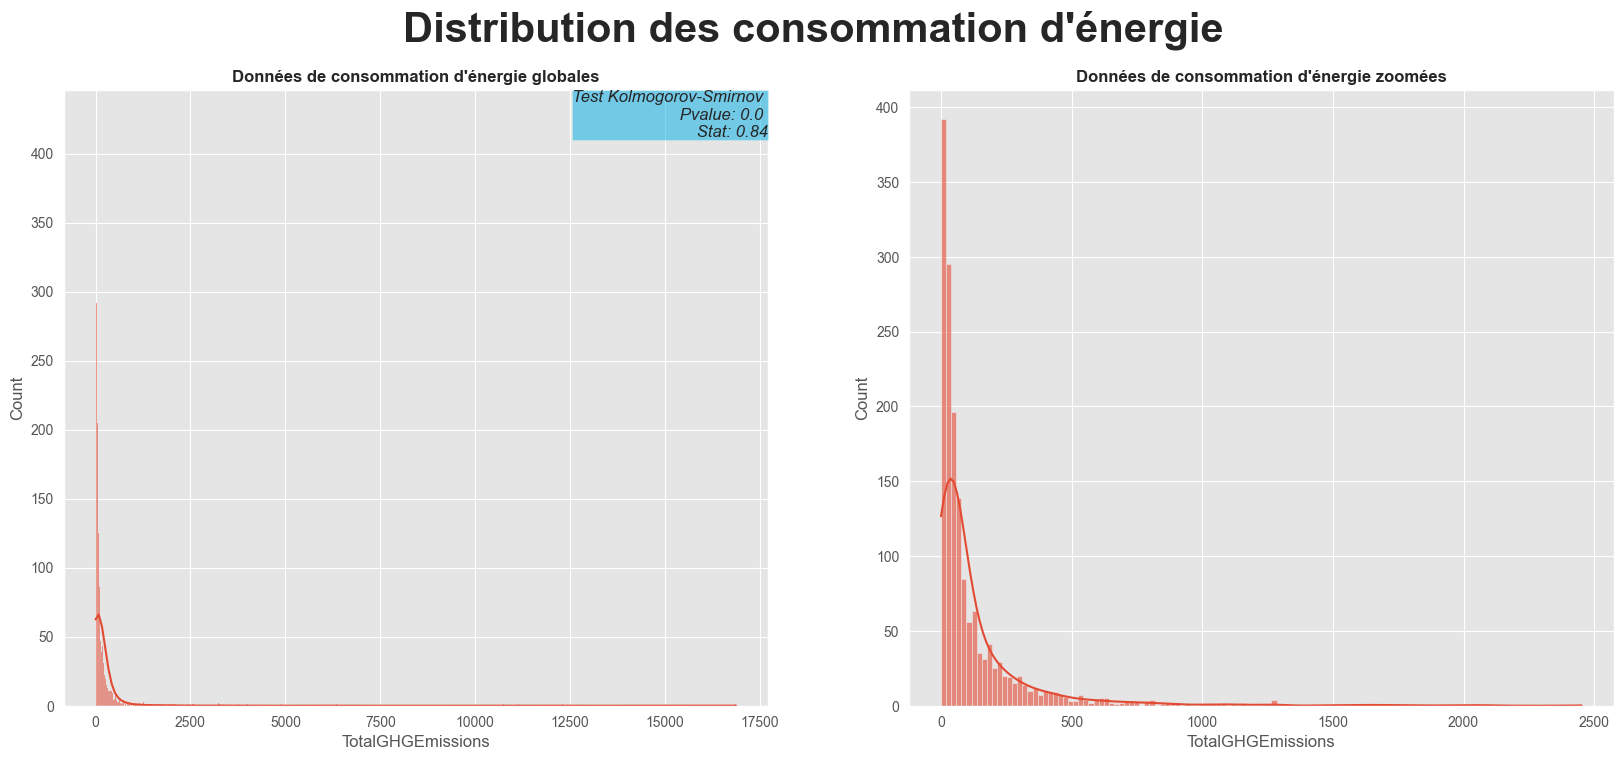

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="TotalGHGEmissions", kde=True, ax=axes[0], alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", fontweight="bold", fontsize=12)

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['TotalGHGEmissions']< 2500)], x="TotalGHGEmissions", kde=True, ax=axes[1],  alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées",fontweight="bold", fontsize=12)

plt.suptitle("Distribution des consommation d'énergie", fontweight="bold", fontsize=30)
plt.show()

In [51]:
data.describe()

Latitude    Longitude  NumberofBuildings  NumberofFloors  \
count  1647.000000  1647.000000        1647.000000     1647.000000   
mean     47.615821  -122.332852           1.170613        4.143898   
std       0.048055     0.024468           2.948222        6.599868   
min      47.499170  -122.411820           0.000000        0.000000   
25%      47.585280  -122.343045           1.000000        1.000000   
50%      47.612330  -122.332940           1.000000        2.000000   
75%      47.649525  -122.321770           1.000000        4.000000   
max      47.733870  -122.258640         111.000000       99.000000   

       PropertyGFATotal  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
count      1.647000e+03               1.647000e+03      1090.000000   
mean       1.186560e+05               9.821041e+04        65.448624   
std        2.975072e+05               2.769352e+05        28.469622   
min        1.128500e+04               0.000000e+00         1.000000   
25%        2.938600e+04               2.533400e+04        48.250000   
50%        4.892500e+04               4.333600e+04        73.000000   
75%        1.055500e+05               9.179000e+04        89.000000   
max        9.320156e+06               9.320156e+06       100.000000   

       SiteEnergyUse(kBtu)  TotalGHGEmissions          Age  ...  \
count         1.647000e+03        1647.000000  1647.000000  ...   
mean          8.526249e+06         186.608312    54.261688  ...   
std           3.040511e+07         756.100005    32.787843  ...   
min           1.680890e+04           0.120000     1.000000  ...   
25%           1.257404e+06          20.470000    27.000000  ...   
50%           2.595784e+06          49.900000    51.000000  ...   
75%           6.962845e+06         143.875000    86.000000  ...   
max           8.739237e+08       16870.980000   116.000000  ...   

       ENERGYSTARScore_log  SiteEnergyUse(kBtu)_log  TotalGHGEmissions_log  \
count          1090.000000              1647.000000            1647.000000   
mean              3.955154                14.897876               4.000265   
std               0.907756                 1.385043               1.457185   
min               0.000000                 0.000000               0.000000   
25%               3.876356                14.031103               3.061052   
50%               4.290459                14.762903               3.927503   
75%               4.488636                15.753682               4.975036   
max               4.605170                20.588484               9.733402   

           Age_log  GFABuildingRate_log  GFAParkingRate_log  NumberOfUses_log  \
count  1647.000000          1647.000000         1647.000000       1647.000000   
mean      3.719377             0.602728            0.052486          0.488246   
std       0.870501             0.085909            0.116124          0.530492   
min       0.000000             0.000000            0.000000          0.000000   
25%       3.295837             0.639219            0.000000          0.000000   
50%       3.931826             0.639219            0.000000          0.693147   
75%       4.454347             0.639219            0.000000          0.693147   
max       4.753590             0.639219            0.639219          2.564949   

       SteamUse_Perc_log  Electricity_Perc_log  NaturalGas_Perc_log  
count        1647.000000           1647.000000          1647.000000  
mean            0.219505              4.161593             2.423814  
std             0.839690              0.498418             1.732554  
min             0.000000              0.000000             0.000000  
25%             0.000000              3.903688             0.000000  
50%             0.000000              4.255755             3.238286  
75%             0.000000              4.614922             3.920685  
max             4.352855              4.615121             4.615121  

[8 rows x 32 columns]

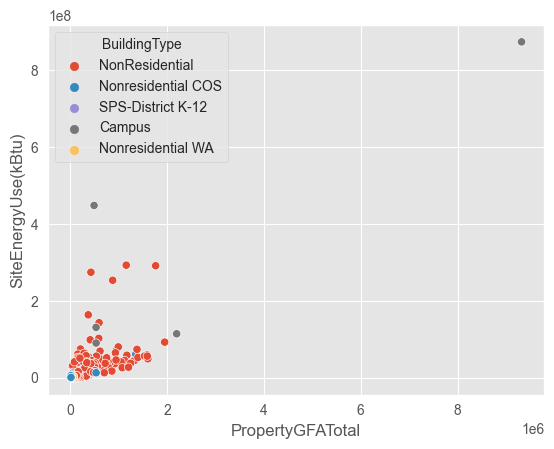

In [52]:
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.show()

In [126]:
data[data['SiteEnergyUse(kBtu)']>8*10**8]

BuildingType PrimaryPropertyType                    Address     City  \
3274       Campus          University  NE 45th St & Brooklyn Ave  Seattle   

     State Neighborhood  Latitude  Longitude  NumberofBuildings  \
3274    WA    NORTHEAST  47.65644 -122.31041              111.0   

      NumberofFloors  ...  ENERGYSTARScore_log SiteEnergyUse(kBtu)_log  \
3274               0  ...                  NaN               20.588484   

      TotalGHGEmissions_log  Age_log  GFABuildingRate_log  GFAParkingRate_log  \
3274               9.318427  4.75359             0.639219                 0.0   

      NumberOfUses_log  SteamUse_Perc_log  Electricity_Perc_log  \
3274               0.0           2.372111               4.33323   

      NaturalGas_Perc_log  
3274                  0.0  

[1 rows x 39 columns]

In [127]:

data = data[data['SiteEnergyUse(kBtu)']<8*10**8]

In [128]:
data.drop(columns=['Address', 'City', 'State'], inplace=True)

In [129]:
data.head()

BuildingType PrimaryPropertyType Neighborhood  Latitude  Longitude  \
0  NonResidential               Hotel     DOWNTOWN  47.61220 -122.33799   
1  NonResidential               Hotel     DOWNTOWN  47.61317 -122.33393   
2  NonResidential               Hotel     DOWNTOWN  47.61393 -122.33810   
3  NonResidential               Hotel     DOWNTOWN  47.61412 -122.33664   
4  NonResidential               Hotel     DOWNTOWN  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal LargestPropertyUseType  \
0                1.0              12             88434                  Hotel   
1                1.0              11            103566                  Hotel   
2                1.0              41            956110                  Hotel   
3                1.0              10             61320                  Hotel   
4                1.0              18            175580                  Hotel   

   LargestPropertyUseTypeGFA  ...  ENERGYSTARScore_log  \
0                    88434.0  ...             4.094345   
1                    83880.0  ...             4.110874   
2                   756493.0  ...             3.761200   
3                    61320.0  ...             4.025352   
4                   123445.0  ...             4.317488   

   SiteEnergyUse(kBtu)_log  TotalGHGEmissions_log   Age_log  \
0                15.790918               5.524895  4.488636   
1                15.940299               5.692856  2.995732   
2                18.100065               7.644996  3.850148   
3                15.729160               5.660562  4.499810   
4                16.465635               6.226319  3.583519   

   GFABuildingRate_log  GFAParkingRate_log  NumberOfUses_log  \
0             0.639219            0.000000          0.000000   
1             0.559330            0.135841          1.098612   
2             0.524314            0.187060          0.000000   
3             0.639219            0.000000          0.000000   
4             0.433015            0.302398          1.098612   

   SteamUse_Perc_log  Electricity_Perc_log  NaturalGas_Perc_log  
0           3.357942              4.018363             2.926382  
1           0.000000              3.680343             4.132603  
2           3.424588              4.237434             1.118415  
3           3.514228              3.731699             3.319987  
4           0.000000              3.660480             4.145038  

[5 rows x 36 columns]

In [130]:
data.to_csv('df_final.csv', index=False)

In [131]:
data

BuildingType               PrimaryPropertyType  \
0         NonResidential                             Hotel   
1         NonResidential                             Hotel   
2         NonResidential                             Hotel   
3         NonResidential                             Hotel   
4         NonResidential                             Hotel   
...                  ...                               ...   
3371  Nonresidential COS  Office/Medical_Office/Laboratory   
3372  Nonresidential COS                             Other   
3373  Nonresidential COS                             Other   
3374  Nonresidential COS                Mixed Use Property   
3375  Nonresidential COS                Mixed Use Property   

               Neighborhood  Latitude  Longitude  NumberofBuildings  \
0                  DOWNTOWN  47.61220 -122.33799                1.0   
1                  DOWNTOWN  47.61317 -122.33393                1.0   
2                  DOWNTOWN  47.61393 -122.33810                1.0   
3                  DOWNTOWN  47.61412 -122.33664                1.0   
4                  DOWNTOWN  47.61375 -122.34047                1.0   
...                     ...       ...        ...                ...   
3371       GREATER DUWAMISH  47.56722 -122.31154                1.0   
3372               DOWNTOWN  47.59625 -122.32283                1.0   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784                1.0   
3374       GREATER DUWAMISH  47.52832 -122.32431                1.0   
3375       GREATER DUWAMISH  47.53939 -122.29536                1.0   

      NumberofFloors  PropertyGFATotal LargestPropertyUseType  \
0                 12             88434                  Hotel   
1                 11            103566                  Hotel   
2                 41            956110                  Hotel   
3                 10             61320                  Hotel   
4                 18            175580                  Hotel   
...              ...               ...                    ...   
3371               1             12294                 Office   
3372               1             16000     Other - Recreation   
3373               1             13157     Other - Recreation   
3374               1             14101     Other - Recreation   
3375               1             18258     Other - Recreation   

      LargestPropertyUseTypeGFA  ...  ENERGYSTARScore_log  \
0                       88434.0  ...             4.094345   
1                       83880.0  ...             4.110874   
2                      756493.0  ...             3.761200   
3                       61320.0  ...             4.025352   
4                      123445.0  ...             4.317488   
...                         ...  ...                  ...   
3371                    12294.0  ...             3.828641   
3372                    16000.0  ...                  NaN   
3373                     7583.0  ...                  NaN   
3374                     6601.0  ...                  NaN   
3375                     8271.0  ...                  NaN   

      SiteEnergyUse(kBtu)_log  TotalGHGEmissions_log   Age_log  \
0                   15.790918               5.524895  4.488636   
1                   15.940299               5.692856  2.995732   
2                   18.100065               7.644996  3.850148   
3                   15.729160               5.660562  4.499810   
4                   16.465635               6.226319  3.583519   
...                       ...                    ...       ...   
3371                13.632714               3.082827  3.258097   
3372                13.746662               3.498022  2.484907   
3373                15.564552               5.413519  3.737670   
3374                13.462633               3.135059  3.295837   
3375                13.943102               3.741235  4.356709   

      GFABuildingRate_log  GFAParkingRate_log  NumberOfUses_log  \
0                0.639219            0.0

In [132]:
numerical_features

['Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'Age',
 'GFABuildingRate',
 'GFAParkingRate',
 'NumberOfUses',
 'SteamUse_Perc',
 'Electricity_Perc',
 'NaturalGas_Perc']